In [299]:
# import numpy as np
import pandas as pd
from IPython.display import display

from random import randrange
from pandas import Series
from matplotlib import pyplot
# from statsmodels.tsa.seasonal import seasonal_decompose
# import numpy as np
# np.float_ = np.float64
# from prophet import Prophet

import math
import matplotlib.pyplot as plt
# !pip install "numpy<2"
from typing import Any, List, Dict, AnyStr, Optional
from pathlib import Path
from glob import glob
from utils.dataset import MarketData

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [297]:
DATA_DIR = Path('data/')

files = [file for file in DATA_DIR.iterdir() if '.DS_Store' not in file.as_posix()]

In [298]:
files[0]

PosixPath('data/data_sheet2.xlsx')

# Data Loading and Cleaning

In [96]:
ta_df.columns = ['Date', 'EUA-MACD', 'EUA-RSI', 'EUA-BB', 'Z-macd', 'Z-RSI',
                 'Z-BB', '1M Trend', '3M Trend', '6M Trend', '1M Trend.1', '3M Trend.1',
                 '6M Trend.1', '1M Trend.2', '3M Trend.2', '6M Trend.2', 'Unnamed: 16', 'nan.1',
                 'EUA-TTF-5', 'EUA-TTF-30', 'EUA-TTF-60', 'EUA-TTF-200', 'Unnamed: 22', 'nan.2',
                 'eua_directional', 'TTF_directional', 'EUA-WTCL', 'TTF-WTCL', 'eua 5', 'ttf 5',
                 'difference', 'diff z', 'Unnamed: 32', 'eua 20', 'ttf20', 'difference.1',
                 'diff z.1', 'Unnamed: 37', 'eua 60', 'ttf60', 'difference.2', 'diff z.2',
                 'Unnamed: 42', 'eua 200', 'ttf 200', 'difference.3', 'diff z.3', 'Unnamed: 47',
                 'C1', 'C2']


TA_COL_NAMES = ['Date', 'EUA-MACD', 'EUA-RSI', 'EUA-BB', '1M Trend', '3M Trend', '6M Trend', '1M Trend.1', '3M Trend.1',
       '6M Trend.1', '1M Trend.2', '3M Trend.2', '6M Trend.2', 'EUA-TTF-5', 'EUA-TTF-30', 'EUA-TTF-60', 'EUA-TTF-200',
       'eua_directional', 'TTF_directional', 'EUA-WTCL', 'TTF-WTCL', 'eua 5', 'ttf 5', 'difference', 
       'eua 20', 'ttf20', 'difference.1', 'eua 60', 'ttf60', 'difference.2', 'eua 200', 'ttf 200', 'difference.3']


ta_df = ta_df[TA_COL_NAMES]
ta_df.columns = ['Date', 'EUA-MACD', 'EUA-RSI', 'EUA-BB'
                 , 'EUA RSI 1M', 'EUA RSI 3M', 'EUA RSI 6M', 'EUA MACD 1M', 'EUA MACD 3M', 'EUA MACD 6M', 'EUA BB 1M', 'EUA BB 3M', 'EUA BB 6M'
                 , 'EUA-TTF-5', 'EUA-TTF-30', 'EUA-TTF-60', 'EUA-TTF-200'
                 , 'eua_directional', 'TTF_directional', 'EUA-WTCL', 'TTF-WTCL'
                 , 'eua 5', 'ttf 5', 'difference', 'eua 20', 'ttf 20', 'difference 20', 'eua 60', 'ttf 60', 'difference 60', 'eua 200', 'ttf 200', 'difference 200']


### Visualizing Features

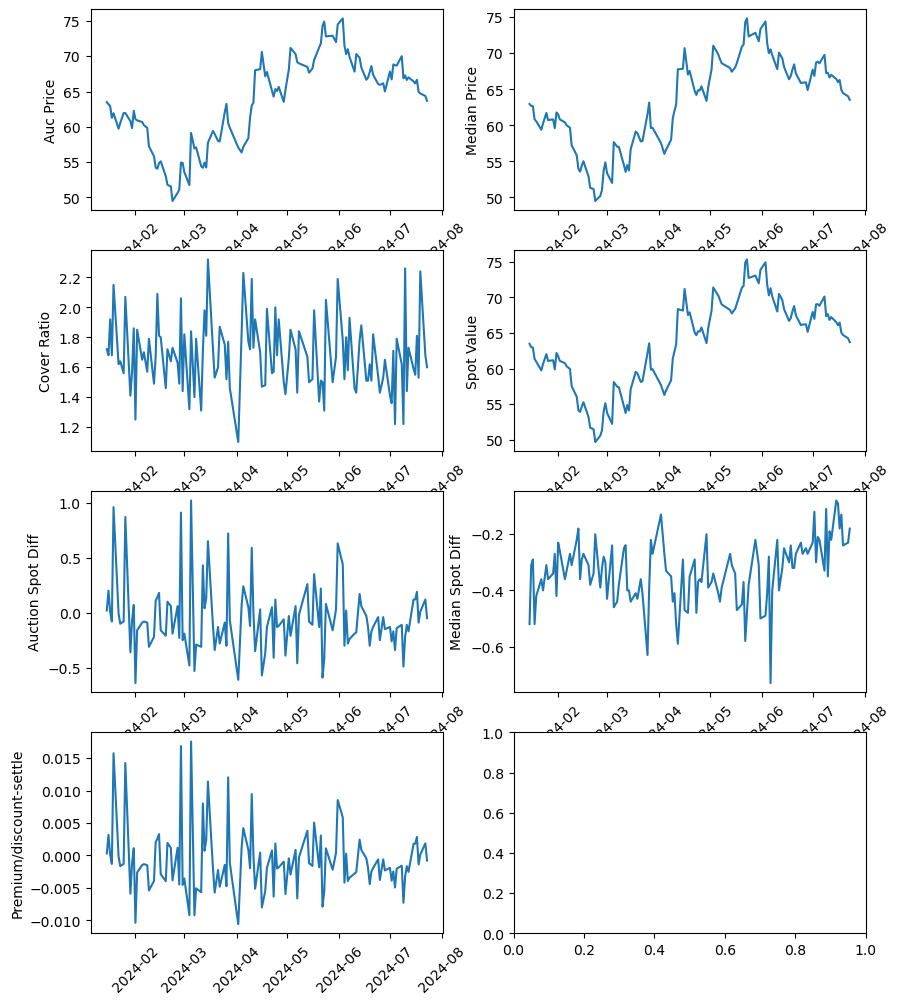

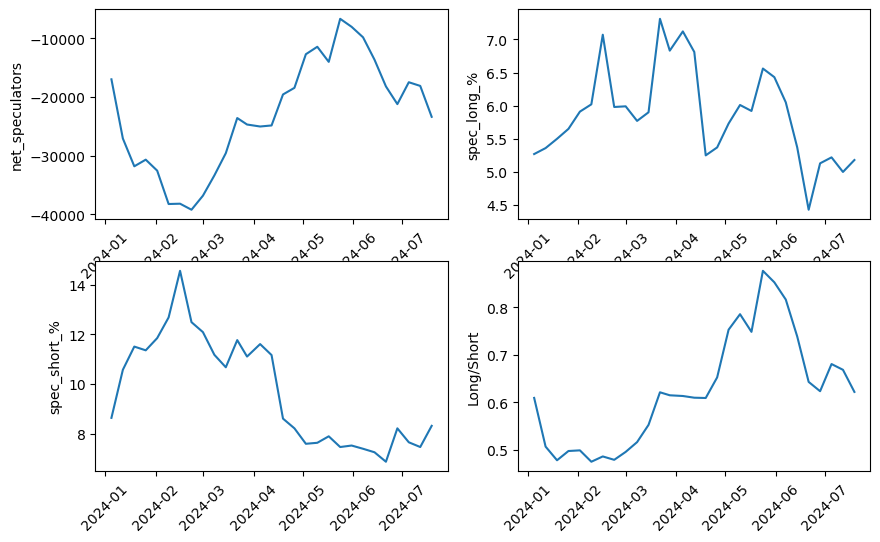

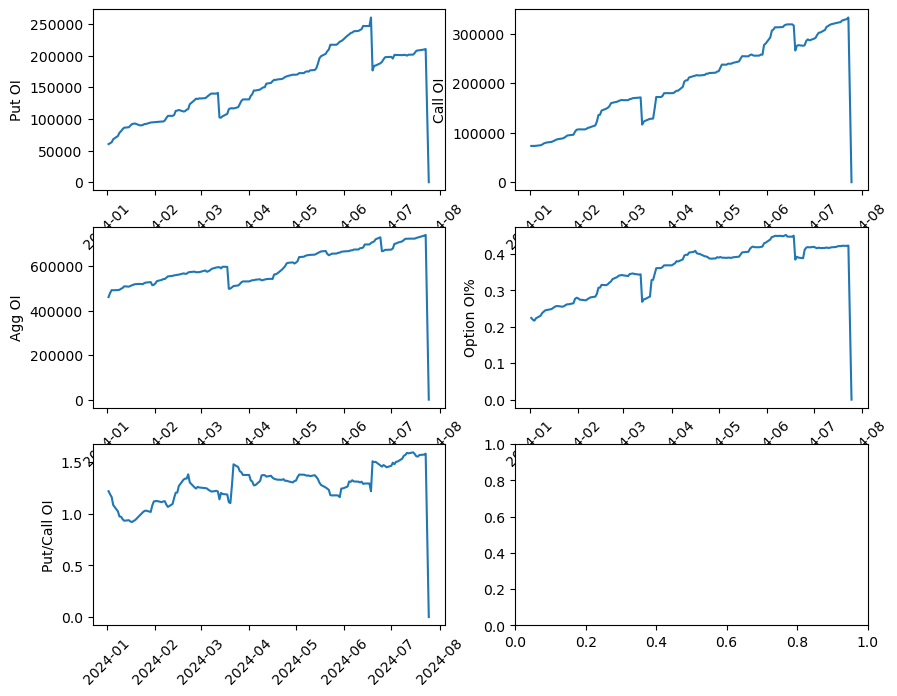

In [97]:



temp_df = auction_df.copy()
temp_df = temp_df[temp_df['Date'].dt.year > 2023].set_index('Date').copy()
# temp_df = temp_df.set_index('Date').copy()
COLUMN_NAMES = temp_df.columns

NUMBER_OF_COLUMNS = 2
NUMBER_OF_ROWS = int(math.ceil(len(COLUMN_NAMES))/NUMBER_OF_COLUMNS)+1

figure, axes = plt.subplots(nrows=NUMBER_OF_ROWS, ncols=NUMBER_OF_COLUMNS, figsize= (10,12))

for index, column in enumerate(COLUMN_NAMES):
    # print(index, column)
    row_index: int = int(math.floor(index / NUMBER_OF_COLUMNS))
    column_index: int = index % NUMBER_OF_COLUMNS
    axes[row_index, column_index].plot(temp_df.index, temp_df[column].fillna(0))
    axes[row_index, column_index].set_ylabel(column)
    plt.setp(axes[row_index, column_index].get_xticklabels(), rotation=45)
    # break


temp_df = cot_df.copy()
temp_df = temp_df[temp_df['Date'].dt.year > 2023].set_index('Date').copy()
# temp_df = temp_df.set_index('Date')
COLUMN_NAMES = ['net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short']

NUMBER_OF_COLUMNS = 2
NUMBER_OF_ROWS = int(math.ceil(len(COLUMN_NAMES))/NUMBER_OF_COLUMNS)

figure, axes = plt.subplots(nrows=NUMBER_OF_ROWS, ncols=NUMBER_OF_COLUMNS, figsize= (10,6))

for index, column in enumerate(COLUMN_NAMES):
    # print(index, column)
    row_index: int = int(math.floor(index / NUMBER_OF_COLUMNS))
    column_index: int = index % NUMBER_OF_COLUMNS
    axes[row_index, column_index].plot(temp_df.index, temp_df[column].fillna(0))
    axes[row_index, column_index].set_ylabel(column)
    plt.setp(axes[row_index, column_index].get_xticklabels(), rotation=45)


temp_df = eua_df.copy()
temp_df = temp_df[temp_df['Date'].dt.year > 2023].set_index('Date').copy()
# temp_df = temp_df.set_index('Date')
COLUMN_NAMES = ['Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI']
NUMBER_OF_COLUMNS = 2
NUMBER_OF_ROWS = int(math.ceil(len(COLUMN_NAMES))/NUMBER_OF_COLUMNS)+1

figure, axes = plt.subplots(nrows=NUMBER_OF_ROWS, ncols=NUMBER_OF_COLUMNS, figsize= (10,8))
for index, column in enumerate(COLUMN_NAMES):
    row_index: int = int(math.floor(index/NUMBER_OF_COLUMNS))
    column_index: int = index % NUMBER_OF_COLUMNS
    axes[row_index, column_index].plot(temp_df.index, temp_df[column].fillna(0))
    axes[row_index, column_index].set_ylabel(column)
    plt.setp(axes[row_index, column_index].get_xticklabels(), rotation=45)


### Merging COT and Auction DF

In [300]:
import tensorflow as tf
from utils.dataset import MarketData
import numpy as np

In [301]:
cot_df, auction_df, eua_df, ta_df, fundamentals_df = MarketData.latest(Path('data'))
cot_df = cot_df.set_index('Date').resample('W', origin='end').mean().reset_index()
auction_df = auction_df.set_index('Date').resample('D').mean()


In [302]:
merged_df = pd.merge_asof(auction_df, cot_df, on='Date', direction='backward')
merged_df.ffill(inplace=True)
merged_df.bfill(inplace=True)

In [303]:
# merged_df.to_csv('data/merged_data_latest.csv', index=False)

In [304]:
merged_df.describe().round(2).T

count                 mean                  min  \
Date                       2244  2021-06-29 12:00:00  2018-06-04 00:00:00   
Auc Price                2244.0                 50.9                 14.2   
Median Price             2244.0                50.78                 14.2   
Cover Ratio              2244.0                 1.98                 1.01   
Spot Value               2244.0                50.97                14.26   
Auction Spot Diff        2244.0                -0.07                -2.37   
Median Spot Diff         2244.0                 0.68                -1.56   
Premium/discount-settle  2244.0                 -0.0                -0.03   
net_speculators          2244.0             28127.47            -39203.42   
spec_long_%              2244.0                 6.77                 2.93   
spec_short_%             2244.0                 3.89                 0.36   
Long/Short               2244.0                 2.74                 0.45   

                                         25%                  50%  \
Date                     2019-12-16 18:00:00  2021-06-29 12:00:00   
Auc Price                              24.82                52.98   
Median Price                           24.72                52.94   
Cover Ratio                             1.61                 1.86   
Spot Value                             24.81                53.14   
Auction Spot Diff                      -0.18                -0.06   
Median Spot Diff                       -0.28                -0.15   
Premium/discount-settle                 -0.0                 -0.0   
net_speculators                       3364.5             32296.29   
spec_long_%                             5.05                 6.24   
spec_short_%                            2.06                 2.73   
Long/Short                              1.07                 2.47   

                                         75%                  max       std  
Date                     2023-01-11 06:00:00  2024-07-25 00:00:00       NaN  
Auc Price                              78.14                97.51     26.44  
Median Price                           77.97                97.34     26.39  
Cover Ratio                             2.22                 6.56      0.57  
Spot Value                              78.2                97.53     26.46  
Auction Spot Diff                       0.05                 1.46      0.28  
Median Spot Diff                        -0.1                90.24      7.85  
Premium/discount-settle                  0.0                 0.04       0.0  
net_speculators                     49170.57            103955.97  32737.02  
spec_long_%                             7.69                15.33      2.43  
spec_short_%                            5.17                14.55      2.75  
Long/Short                              3.43                15.17      2.17

In [305]:
merged_df.isna().sum()

Date                       0
Auc Price                  0
Median Price               0
Cover Ratio                0
Spot Value                 0
Auction Spot Diff          0
Median Spot Diff           0
Premium/discount-settle    0
net_speculators            0
spec_long_%                0
spec_short_%               0
Long/Short                 0
dtype: int64

In [306]:
merged_df.loc[:, 'Pct_Change_Auc_Price'] = merged_df['Auc Price'].pct_change() * 100

# Drop the first row as it will have a NaN value due to the pct_change calculation


In [339]:
test_cols = ['Auc Price', 'Cover Ratio', 'Auction Spot Diff', 'Median Spot Diff', 'Premium/discount-settle',
       'net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short']

train_df = merged_df[merged_df['Date'] < "2022-06-01"].copy().set_index('Date')[test_cols]
val_df = merged_df[(merged_df['Date'].dt.year == 2022) & (merged_df['Date'].dt.month >= 6)].copy().set_index('Date')[test_cols]
test_df = merged_df[merged_df['Date'].dt.year == 2023].copy().set_index('Date')[test_cols]

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

num_features = train_df.shape[1]

In [340]:
train_df

Auc Price  Cover Ratio  Auction Spot Diff  Median Spot Diff  \
Date                                                                      
2018-06-05  -0.966950     0.479070          -0.048835         -0.129219   
2018-06-06  -0.997623     0.526993          -0.252857         -0.133603   
2018-06-07  -0.976860     0.542967           0.818257         -0.124834   
2018-06-08  -0.993848    -0.335628          -0.150846         -0.127026   
2018-06-09  -0.993848    -0.335628          -0.150846         -0.127026   
...               ...          ...                ...               ...   
2022-05-27   2.056916     0.319325          -1.681009         -0.148949   
2022-05-28   2.056916     0.319325          -1.681009         -0.148949   
2022-05-29   2.056916     0.319325          -1.681009         -0.148949   
2022-05-30   2.213583     0.766610           1.175295         -0.139084   
2022-05-31   2.207920     0.319325          -0.711906         -0.145661   

            Premium/discount-settle  net_speculators  spec_long_%  \
Date                                                                
2018-06-05                 0.452740         0.186574    -0.892359   
2018-06-06                 0.452740         0.186574    -0.892359   
2018-06-07                 0.452740         0.186574    -0.892359   
2018-06-08                 0.452740         0.186574    -0.892359   
2018-06-09                 0.452740         0.186574    -0.892359   
...                             ...              ...          ...   
2022-05-27                -0.664049        -1.285537    -0.960357   
2022-05-28                -0.664049        -1.285537    -0.960357   
2022-05-29                -0.664049        -1.322109    -0.936358   
2022-05-30                 0.738256        -1.322109    -0.936358   
2022-05-31                -0.165285        -1.322109    -0.936358   

            spec_short_%  Long/Short  
Date                                  
2018-06-05     -1.517772    4.722487  
2018-06-06     -1.517772    4.722487  
2018-06-07     -1.517772    4.722487  
2018-06-08     -1.517772    4.722487  
2018-06-09     -1.517772    4.722487  
...                  ...         ...  
2022-05-27     -0.017867   -0.763667  
2022-05-28     -0.017867   -0.763667  
2022-05-29      0.068795   -0.796640  
2022-05-30      0.068795   -0.796640  
2022-05-31      0.068795   -0.796640  

[1457 rows x 9 columns]

In [327]:
MAX_EPOCHS = 20


def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history


class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


@property
def train(self):
  return self.make_dataset(self.train_df)


@property
def val(self):
  return self.make_dataset(self.val_df)


@property
def test(self):
  return self.make_dataset(self.test_df)


@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result


def plot(self, model=None, plot_col='Auc Price', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')


def plot_test(self, model=None, plot_col='Auc Price', max_subplots=3):
  inputs, labels = self.test_example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

# Add this method to the class


def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds


def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]]
         for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels


@property
def test_example(self):
    """Get and cache an example batch of `inputs, labels` from the test data for plotting."""
    result = getattr(self, '_test_example', None)
    if result is None:
        # No example batch was found, so get one from the `.test` dataset
        result = next(iter(self.test))
        # And cache it for next time
        self._test_example = result
    return result


# Add this method to the class
WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example
WindowGenerator.split_window = split_window
WindowGenerator.make_dataset = make_dataset
WindowGenerator.plot = plot
WindowGenerator.plot_test = plot_test
WindowGenerator.test_example = test_example

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [14 15 16 17 18 19 20]
Label column name(s): None

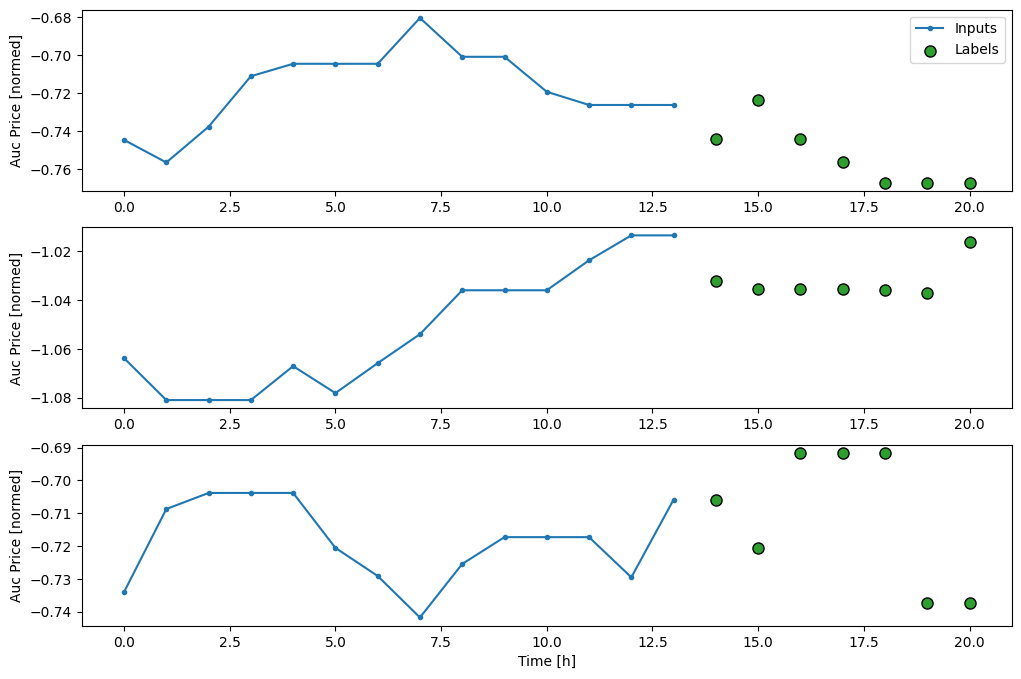

In [328]:
OUT_STEPS = 7
multi_window = WindowGenerator(input_width=14,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.1504 - mean_absolute_error: 0.4687


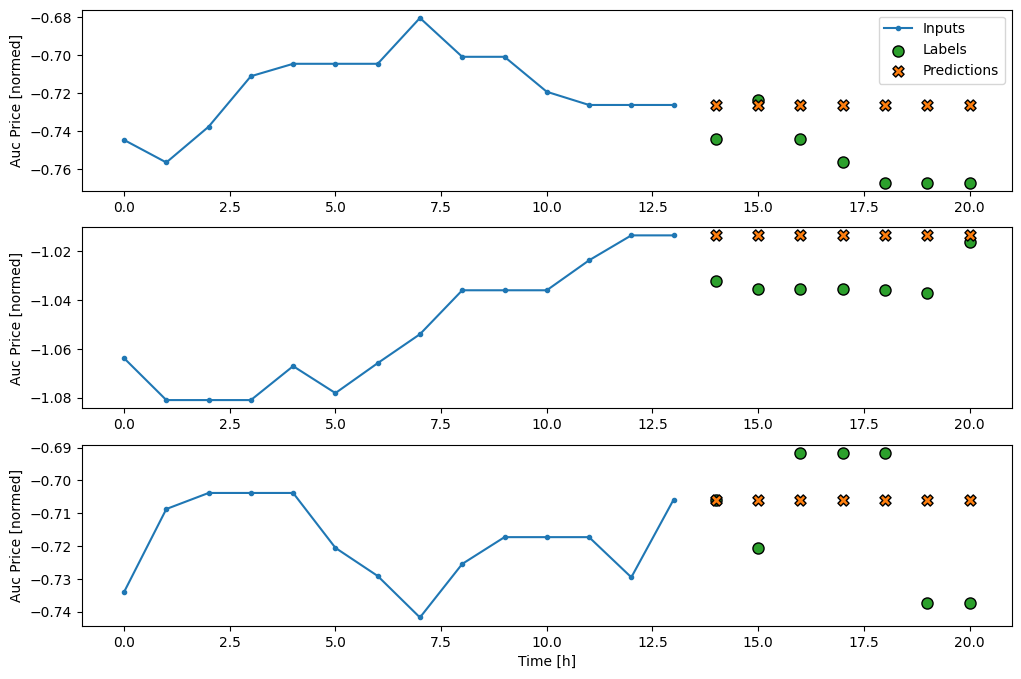

In [329]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

In [315]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(repeat_baseline)

ValueError: Dimensions must be equal, but are 7 and 14 for '{{node compile_loss/mean_squared_error/sub}} = Sub[T=DT_FLOAT](IteratorGetNext:1, IteratorGetNext)' with input shapes: [?,7,10], [?,14,10].

In [281]:
train_df.shape[1]

10

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.5664 - mean_absolute_error: 0.4414


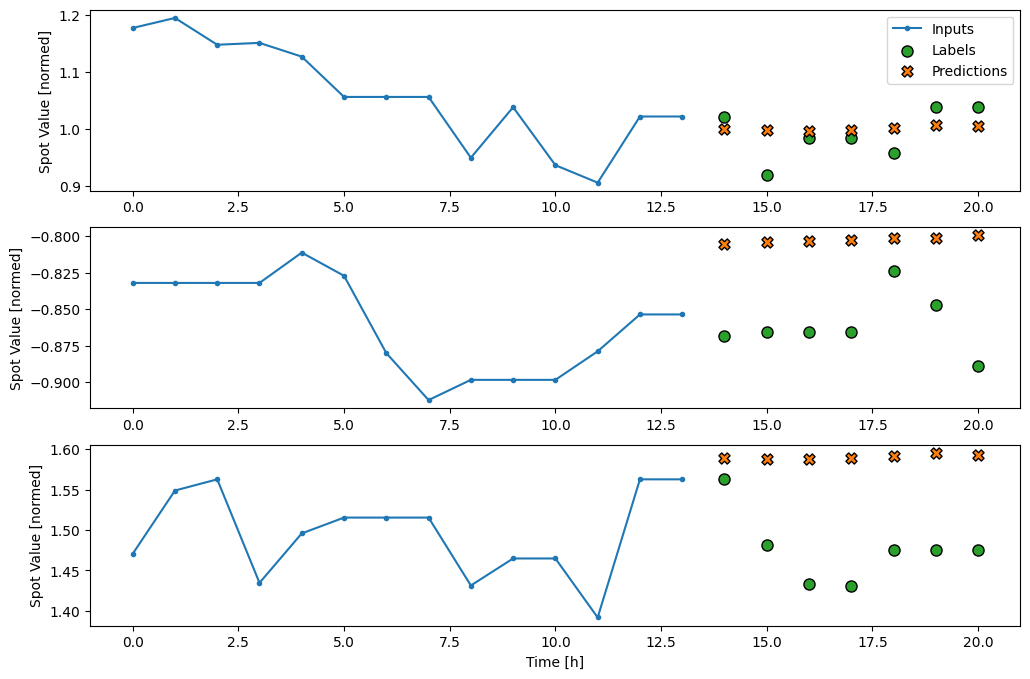

In [317]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_linear_model)

In [284]:
import IPython

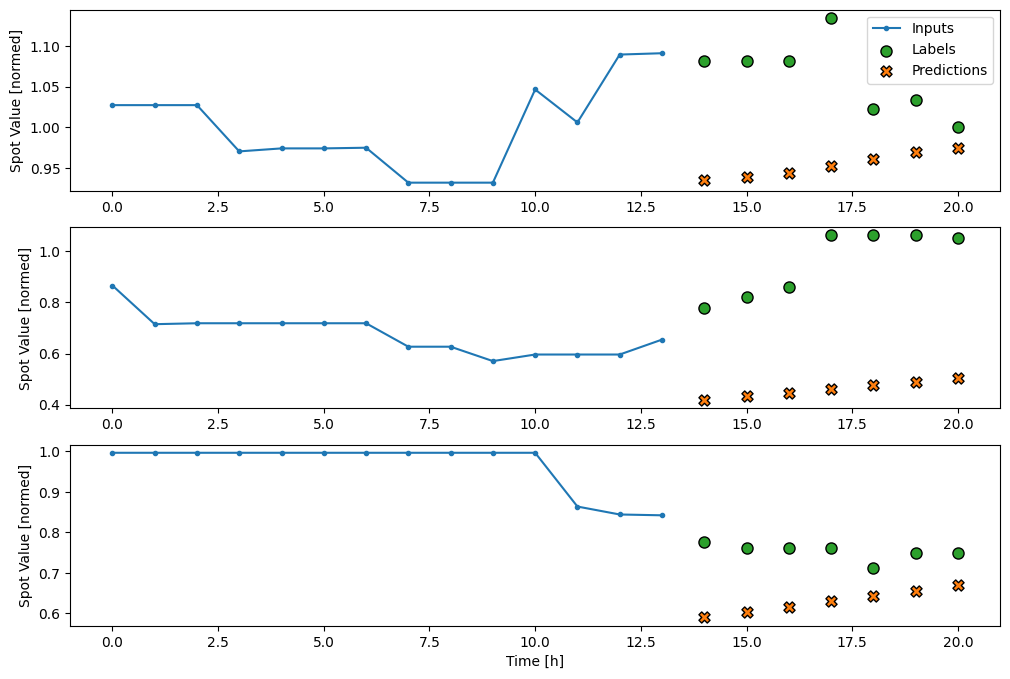

In [318]:
multi_window.plot_test(multi_linear_model)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.4956 - mean_absolute_error: 0.3704


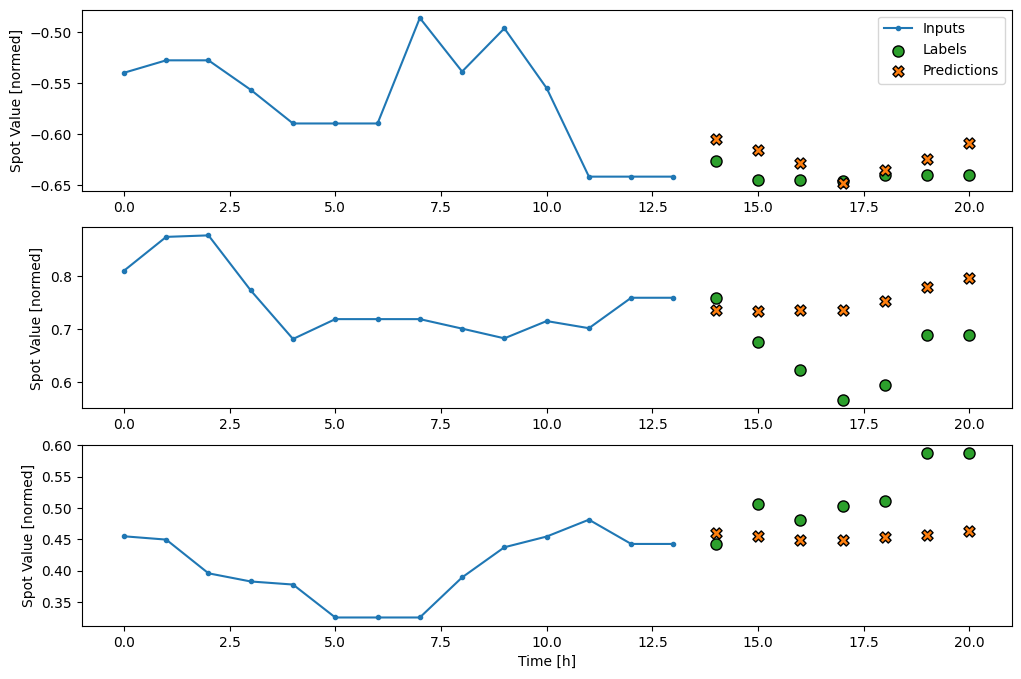

In [285]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)

In [331]:
OUT_STEPS = 14
multi_window = WindowGenerator(input_width=90,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

# multi_window.plot()
# multi_window

In [332]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

MAX_EPOCHS = 50
history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

ValueError: math domain error

In [333]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

ValueError: math domain error

In [289]:

OUT_STEPS = 14
multi_window = WindowGenerator(input_width=90,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)


class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)
    
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state


def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)
FeedBack.call = call
FeedBack.warmup = warmup


In [290]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 10])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1255 - mean_absolute_error: 0.7666 


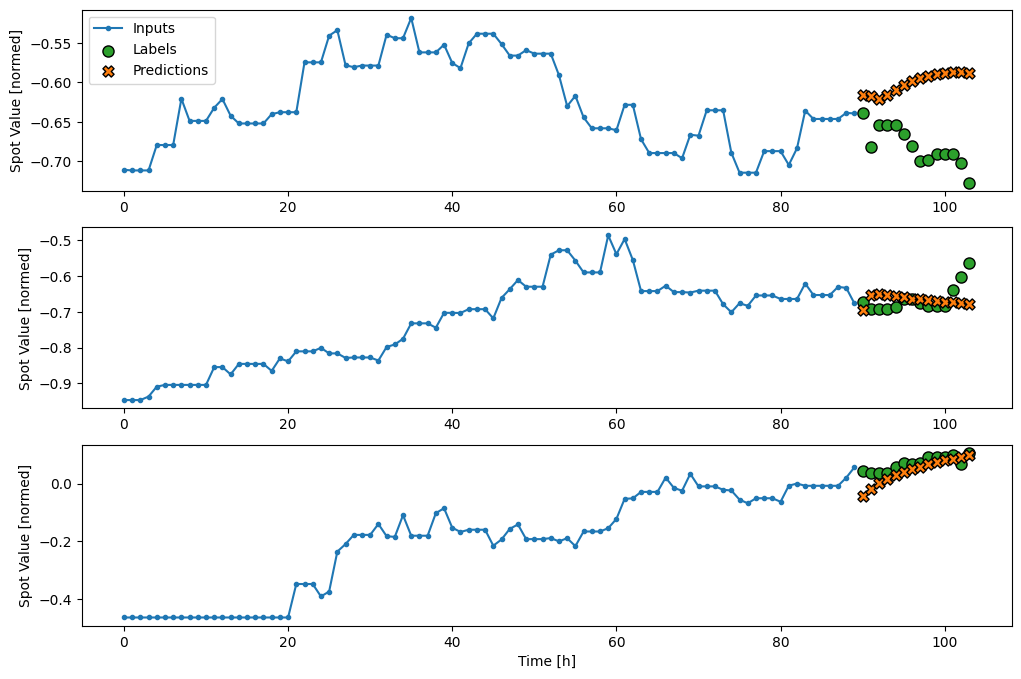

In [291]:


print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)




history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8801 - mean_absolute_error: 0.6467 


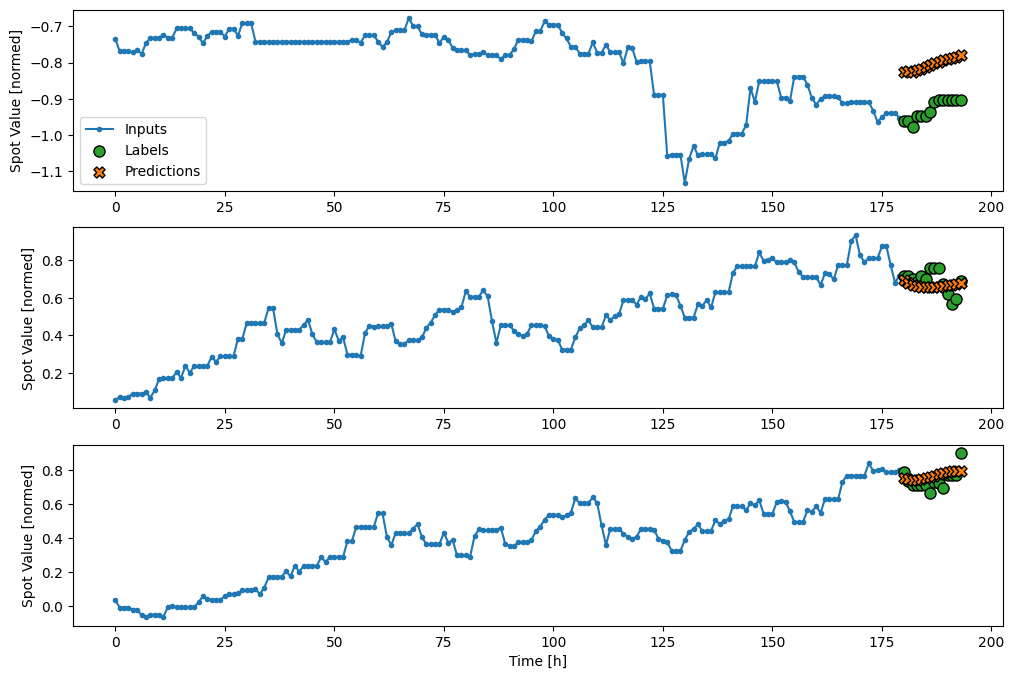

In [294]:

import tensorflow as tf

num_features = train_df.shape[1]
OUT_STEPS = 14
multi_window = WindowGenerator(input_width=180,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

class AdvancedFeedBack(tf.keras.Model):
    def __init__(self, units, out_steps, num_features):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        
        # Bidirectional LSTM layer
        self.bidirectional_lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(units, return_sequences=True))
        
        # Attention mechanism
        self.attention = tf.keras.layers.Attention()
        
        # Dense layers with dropout and residual connections
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.dense = tf.keras.layers.Dense(num_features)
        
    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        prediction = self.dense(x)
        return prediction, state
    
    def call(self, inputs, training=None):
        predictions = []
        prediction, state = self.warmup(inputs)
        predictions.append(prediction)

        for n in range(1, self.out_steps):
            x = prediction
            x, state = self.lstm_cell(x, states=state, training=training)
            x = self.bidirectional_lstm(x)
            
            # Attention mechanism
            context_vector, attention_weights = self.attention([x, x], return_attention_scores=True)
            x = context_vector
            
            # Dense layers with residual connection
            x = self.dense1(x)
            x = self.dropout(x, training=training)
            prediction = self.dense(x)
            predictions.append(prediction)

        predictions = tf.stack(predictions)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions

advanced_feedback_model = AdvancedFeedBack(units=64, out_steps=OUT_STEPS, num_features=num_features)
AdvancedFeedBack.call = call
AdvancedFeedBack.warmup = warmup

prediction, state = advanced_feedback_model.warmup(multi_window.example[0])
print('Output shape (batch, time, features): ', advanced_feedback_model(multi_window.example[0]).shape)

history = compile_and_fit(advanced_feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Advanced AR LSTM'] = advanced_feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Advanced AR LSTM'] = advanced_feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(advanced_feedback_model)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8471 - mean_absolute_error: 0.6447 


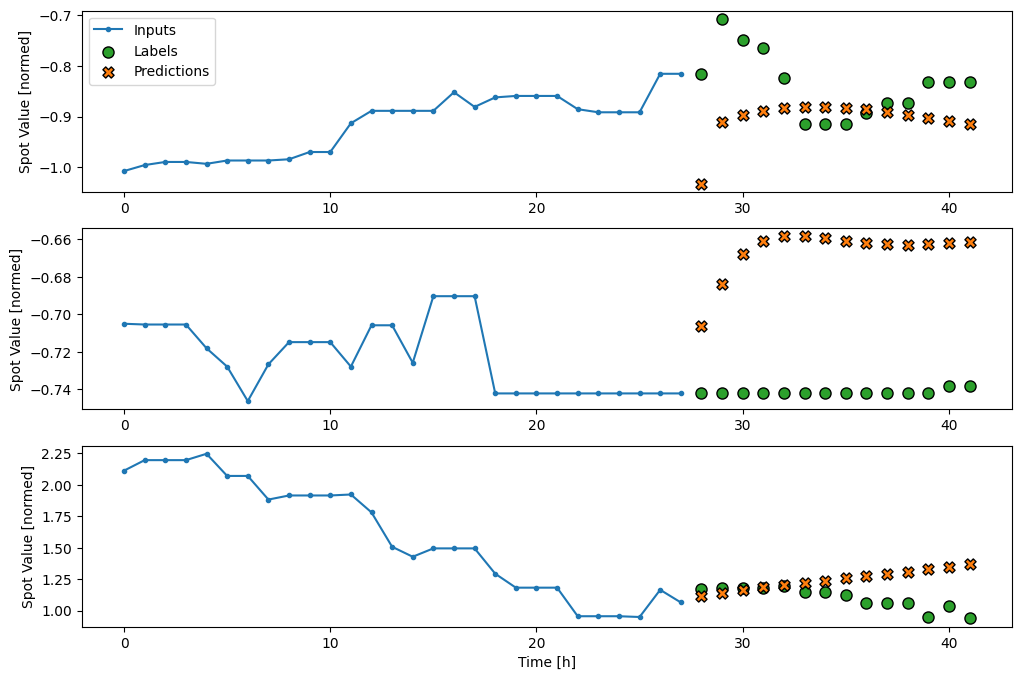

In [321]:
import tensorflow as tf

OUT_STEPS = 14
multi_window = WindowGenerator(input_width=28,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

class AdvancedFeedBack(tf.keras.Model):
    def __init__(self, units, out_steps, num_features, num_heads=4):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        
        # Bidirectional LSTM layer
        self.bidirectional_lstm = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(units, return_sequences=True))
        
        # Multi-head attention mechanism
        # self.multi_head_attention = tf.keras.layers.MultiHeadAttention(
        #     num_heads=num_heads, key_dim=units)
        
        # Dense layers with dropout and residual connections
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.dense = tf.keras.layers.Dense(num_features)
        
    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        prediction = self.dense(x)
        return prediction, state
    
    def call(self, inputs, training=None):
        predictions = []
        prediction, state = self.warmup(inputs)
        predictions.append(prediction)

        for n in range(1, self.out_steps):
            x = prediction
            x, state = self.lstm_cell(x, states=state, training=training)
            x = self.bidirectional_lstm(x)
            
            # Multi-head attention mechanism
            x = self.multi_head_attention(query=x, value=x)
            
            # Dense layers with residual connection
            x = self.dense1(x)
            x = self.dropout(x, training=training)
            prediction = self.dense(x)
            predictions.append(prediction)

        predictions = tf.stack(predictions)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions

advanced_feedback_model = AdvancedFeedBack(units=64, out_steps=OUT_STEPS, num_features=num_features, num_heads=4)
AdvancedFeedBack.call = call
AdvancedFeedBack.warmup = warmup

prediction, state = advanced_feedback_model.warmup(multi_window.example[0])
print('Output shape (batch, time, features): ', advanced_feedback_model(multi_window.example[0]).shape)

history = compile_and_fit(advanced_feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Advanced AR LSTM with Multi-Head Attention'] = advanced_feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Advanced AR LSTM with Multi-Head Attention'] = advanced_feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(advanced_feedback_model)

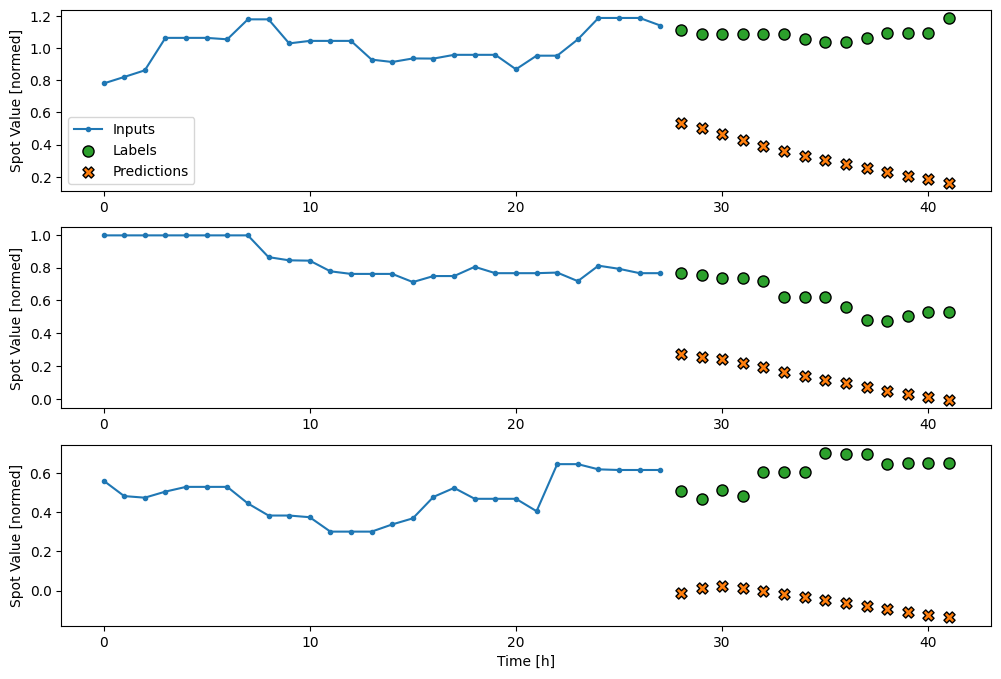

In [322]:
multi_window.plot_test(advanced_feedback_model)

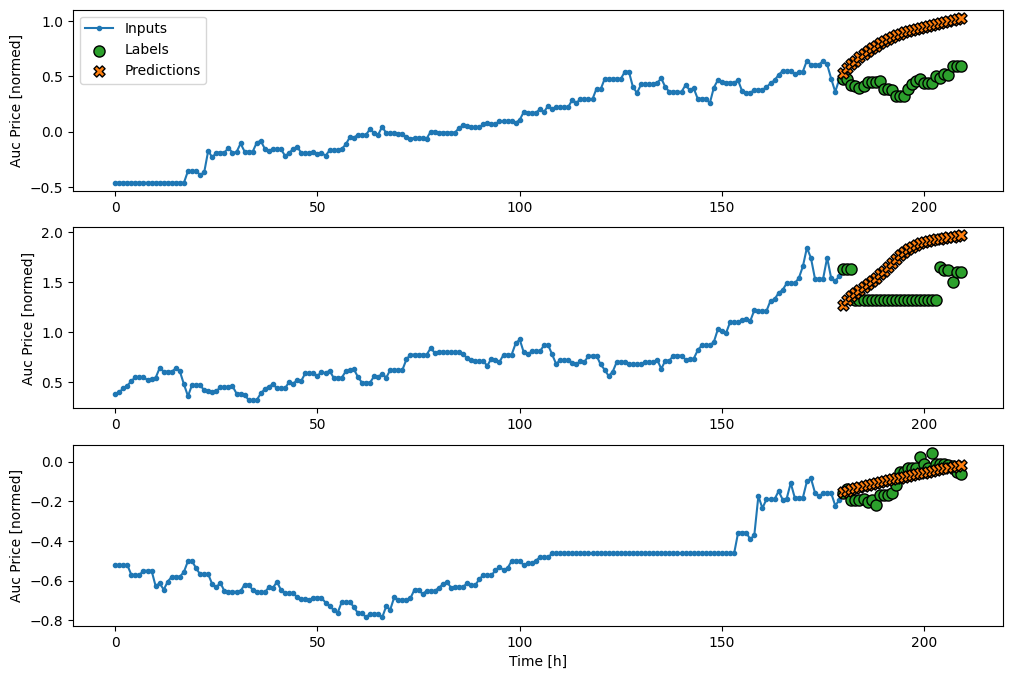

In [296]:
multi_window.plot(advanced_feedback_model, plot_col='Auc Price')

<Axes: xlabel='Date'>

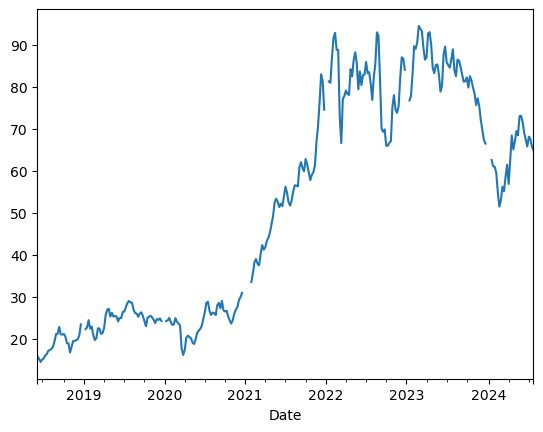

In [55]:
merged_df.set_index('Date')['Auc Price'].plot()

<Axes: xlabel='Date'>

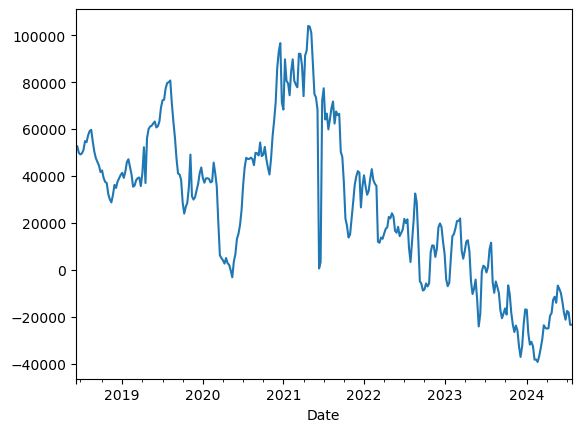

In [56]:
merged_df.set_index('Date')['net_speculators'].plot()

In [45]:
auction_df

Auc Price  Median Price  Cover Ratio  Spot Value  \
Date                                                           
2018-06-10  15.850000     15.806000     2.132000   15.884000   
2018-06-17  15.210000     15.177500     1.902500   15.267500   
2018-06-24  14.456000     14.352000     2.608000   14.428000   
2018-07-01  14.990000     14.947500     2.582500   15.022500   
2018-07-08  15.280000     15.166000     3.570000   15.222000   
...               ...           ...          ...         ...   
2024-06-30  65.795000     65.660000     1.537500   65.915000   
2024-07-07  68.154000     68.146000     1.498000   68.362000   
2024-07-14  67.562000     67.594000     1.654000   67.834000   
2024-07-21  65.788000     65.624000     1.744000   65.768000   
2024-07-28  64.916667     64.676667     1.653333   64.846667   

            Auction Spot Diff  Median Spot Diff  Premium/discount-settle  
Date                                                                      
2018-06-10            -0.0340            -0.078                      NaN  
2018-06-17            -0.0575            -0.090                -0.003876  
2018-06-24             0.0280            -0.076                 0.001912  
2018-07-01            -0.0325            -0.075                -0.002153  
2018-07-08             0.0580            -0.056                 0.003868  
...                       ...               ...                      ...  
2024-06-30            -0.1200            -0.255                -0.001822  
2024-07-07            -0.2080            -0.216                -0.003043  
2024-07-14            -0.2200            -0.240                -0.003254  
2024-07-21             0.0700            -0.144                 0.001050  
2024-07-28             0.0700            -0.170                 0.001062  

[321 rows x 7 columns]

In [98]:


EUA_COL_NAMES = ['Date','Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI']
merged_df = pd.merge_asof(merged_df, eua_df[EUA_COL_NAMES], on='Date', direction='backward')

merged_df.columns = ['Date', 'Auc Price', 'Median Price', 'Cover Ratio', 'Spot Value',
                     'Auction Spot Diff', 'Median Spot Diff', 'Premium/discount-settle',
                     'net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short',
                     'Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI']


merged_df = merged_df.dropna()
merged_df = merged_df.resample('D', on='Date').mean()
merged_df = merged_df.ffill()

merged_df = merged_df.reset_index()
merged_df['day_name'] = merged_df.reset_index()['Date'].dt.day_name()
merged_df['week'] = merged_df.reset_index()['Date'].dt.isocalendar().week
# merged_df = merged_df[merged_df['Date'].dt.year >= 2021]

## Creating Lag Features

In [100]:
# Create lag features
merged_df = merged_df.sort_values(by='Date')

lags = [1, 2, 3, 7, 14]
for lag in lags:
    merged_df[f'Auc_Price_Lag_{lag}'] = merged_df['Auc Price'].shift(lag)
    merged_df[f'Median_Price_Lag_{lag}'] = merged_df['Median Price'].shift(lag)
    merged_df[f'Spot_Value_Lag_{lag}'] = merged_df['Spot Value'].shift(lag)

rolling_windows = [3, 7, 14]
for window in rolling_windows:
    merged_df[f'Auc_Price_Rolling_Mean_{window}'] = merged_df['Auc Price'].rolling(window).mean()
    merged_df[f'Median_Price_Rolling_Mean_{window}'] = merged_df['Median Price'].rolling(window).mean()
    merged_df[f'Spot_Value_Rolling_Mean_{window}'] = merged_df['Spot Value'].rolling(window).mean()

In [101]:
merged_df.to_csv('test_data.csv', index = False)

# Exploratory Data Analysis

In [22]:
data = data.drop('day_name', axis=1)

In [23]:
# 1. Checking for Missing Values
print("Missing Values in Each Column:")
print(data.isnull().sum())

# 2. Summary Statistics
print("\nSummary Statistics:")
print(data.describe())

# 3. Data Types
print("\nData Types of Each Column:")
print(data.dtypes)

Missing Values in Each Column:
Auc Price                        0
Median Price                     0
Cover Ratio                      0
Spot Value                       0
Auction Spot Diff                0
Median Spot Diff                 0
Premium/discount-settle          0
net_speculators                  0
spec_long_%                      0
spec_short_%                     0
Long/Short                       0
Put OI                           0
Call OI                          0
Agg OI                           0
Option OI%                       0
Put/Call OI                      0
week                             0
Auc_Price_Lag_1                  1
Median_Price_Lag_1               1
Spot_Value_Lag_1                 1
Auc_Price_Lag_2                  2
Median_Price_Lag_2               2
Spot_Value_Lag_2                 2
Auc_Price_Lag_3                  3
Median_Price_Lag_3               3
Spot_Value_Lag_3                 3
Auc_Price_Lag_7                  7
Median_Price_Lag_7      

In [24]:
# Dropping rows with missing values in lagged and rolling mean features
df_clean = data.dropna()

# Confirm that there are no missing values
print(df_clean.isnull().sum())

Auc Price                       0
Median Price                    0
Cover Ratio                     0
Spot Value                      0
Auction Spot Diff               0
Median Spot Diff                0
Premium/discount-settle         0
net_speculators                 0
spec_long_%                     0
spec_short_%                    0
Long/Short                      0
Put OI                          0
Call OI                         0
Agg OI                          0
Option OI%                      0
Put/Call OI                     0
week                            0
Auc_Price_Lag_1                 0
Median_Price_Lag_1              0
Spot_Value_Lag_1                0
Auc_Price_Lag_2                 0
Median_Price_Lag_2              0
Spot_Value_Lag_2                0
Auc_Price_Lag_3                 0
Median_Price_Lag_3              0
Spot_Value_Lag_3                0
Auc_Price_Lag_7                 0
Median_Price_Lag_7              0
Spot_Value_Lag_7                0
Auc_Price_Lag_

In [25]:
df_clean.reset_index()

Date  Auc Price  Median Price  Cover Ratio  Spot Value  \
0    2020-05-19      20.02         19.97         1.88       20.04   
1    2020-05-20      20.11         20.06         1.43       20.16   
2    2020-05-21      20.11         20.06         1.43       20.16   
3    2020-05-22      20.11         20.06         1.43       20.16   
4    2020-05-23      20.11         20.06         1.43       20.16   
...         ...        ...           ...          ...         ...   
1522 2024-07-19      64.73         64.48         2.24       64.72   
1523 2024-07-20      64.73         64.48         2.24       64.72   
1524 2024-07-21      64.73         64.48         2.24       64.72   
1525 2024-07-22      64.37         64.02         1.68       64.25   
1526 2024-07-23      63.67         63.54         1.60       63.72   

      Auction Spot Diff  Median Spot Diff  Premium/discount-settle  \
0                 -0.02             -0.07                -0.000998   
1                 -0.05             -0.10                -0.002480   
2                 -0.05             -0.10                -0.002480   
3                 -0.05             -0.10                -0.002480   
4                 -0.05             -0.10                -0.002480   
...                 ...               ...                      ...   
1522               0.01             -0.24                 0.000155   
1523               0.01             -0.24                 0.000155   
1524               0.01             -0.24                 0.000155   
1525               0.12             -0.23                 0.001868   
1526              -0.05             -0.18                -0.000785   

      net_speculators  spec_long_%  ...  Spot_Value_Lag_14  \
0            -3148.75         7.27  ...              19.46   
1            -3148.75         7.27  ...              18.70   
2            -3148.75         7.27  ...              19.01   
3            -3148.75         7.27  ...              19.28   
4            -3148.75         7.27  ...              19.28   
...               ...          ...  ...                ...   
1522        -23378.80         5.18  ...              68.82   
1523        -23378.80         5.18  ...              68.82   
1524        -23378.80         5.18  ...              68.82   
1525        -23378.80         5.18  ...              70.11   
1526        -23378.80         5.18  ...              67.36   

      Auc_Price_Rolling_Mean_3  Median_Price_Rolling_Mean_3  \
0                    19.446667                    19.403333   
1                    19.810000                    19.753333   
2                    20.080000                    20.030000   
3                    20.110000                    20.060000   
4                    20.110000                    20.060000   
...                        ...                          ...   
1522                 65.450000                    65.230000   
1523                 64.806667                    64.626667   
1524                 64.730000                    64.480000   
1525                 64.610000                    64.326667   
1526                 64.256667                    64.013333   

      Spot_Value_Rolling_Mean_3  Auc_Price_Rolling_Mean_7  \
0                     19.506667                 19.067143   
1                     19.853333                 19.265714   
2                     20.120000                 19.514286   
3                     20.160000                 19.670000   
4                     20.160000                 19.825714   
...                         ...                       ...   
1522                  65.413333                 66.137143   
1523                  64.830000                 65.811429   
1524                  64.720000                 65.485714   
1525                  64.563333                 65.191429   
1526                  64.230000                 64.835714   

      Median_Price_Rolling_Mean_7  Spot_Value_Rolling_Mean_7  \
0                       19.024286         

In [33]:
df_clean.loc[:, 'day_name'] = df_clean.reset_index()['Date'].dt.day_name().values

In [34]:
df_clean

Auc Price  Median Price  Cover Ratio  Spot Value  \
Date                                                           
2020-05-19      20.02         19.97         1.88       20.04   
2020-05-20      20.11         20.06         1.43       20.16   
2020-05-21      20.11         20.06         1.43       20.16   
2020-05-22      20.11         20.06         1.43       20.16   
2020-05-23      20.11         20.06         1.43       20.16   
...               ...           ...          ...         ...   
2024-07-19      64.73         64.48         2.24       64.72   
2024-07-20      64.73         64.48         2.24       64.72   
2024-07-21      64.73         64.48         2.24       64.72   
2024-07-22      64.37         64.02         1.68       64.25   
2024-07-23      63.67         63.54         1.60       63.72   

            Auction Spot Diff  Median Spot Diff  Premium/discount-settle  \
Date                                                                       
2020-05-19              -0.02             -0.07                -0.000998   
2020-05-20              -0.05             -0.10                -0.002480   
2020-05-21              -0.05             -0.10                -0.002480   
2020-05-22              -0.05             -0.10                -0.002480   
2020-05-23              -0.05             -0.10                -0.002480   
...                       ...               ...                      ...   
2024-07-19               0.01             -0.24                 0.000155   
2024-07-20               0.01             -0.24                 0.000155   
2024-07-21               0.01             -0.24                 0.000155   
2024-07-22               0.12             -0.23                 0.001868   
2024-07-23              -0.05             -0.18                -0.000785   

            net_speculators  spec_long_%  spec_short_%  ...  \
Date                                                    ...   
2020-05-19         -3148.75         7.27          7.83  ...   
2020-05-20         -3148.75         7.27          7.83  ...   
2020-05-21         -3148.75         7.27          7.83  ...   
2020-05-22         -3148.75         7.27          7.83  ...   
2020-05-23         -3148.75         7.27          7.83  ...   
...                     ...          ...           ...  ...   
2024-07-19        -23378.80         5.18          8.33  ...   
2024-07-20        -23378.80         5.18          8.33  ...   
2024-07-21        -23378.80         5.18          8.33  ...   
2024-07-22        -23378.80         5.18          8.33  ...   
2024-07-23        -23378.80         5.18          8.33  ...   

            Auc_Price_Rolling_Mean_3  Median_Price_Rolling_Mean_3  \
Date                                                                
2020-05-19                 19.446667                    19.403333   
2020-05-20                 19.810000                    19.753333   
2020-05-21                 20.080000                    20.030000   
2020-05-22                 20.110000                    20.060000   
2020-05-23                 20.110000                    20.060000   
...                              ...                          ...   
2024-07-19                 65.450000                    65.230000   
2024-07-20                 64.806667                    64.626667   
2024-07-21                 64.730000                    64.480000   
2024-07-22                 64.610000                    64.326667   
2024-07-23                 64.256667                    64.013333   

            Spot_Value_Rolling_Mean_3  Auc_Price_Rolling_Mean_7  \
Date                                                              
2020-05-19                  19.506667                 19.067143   
2020-05-20                  19.853333                 19.265714   
2020-05-21                  20.120000                 19.514286   
2020-05-22                  20.160000                 19.670000   
2020-05-23                  20.160000                 19.825714   
...

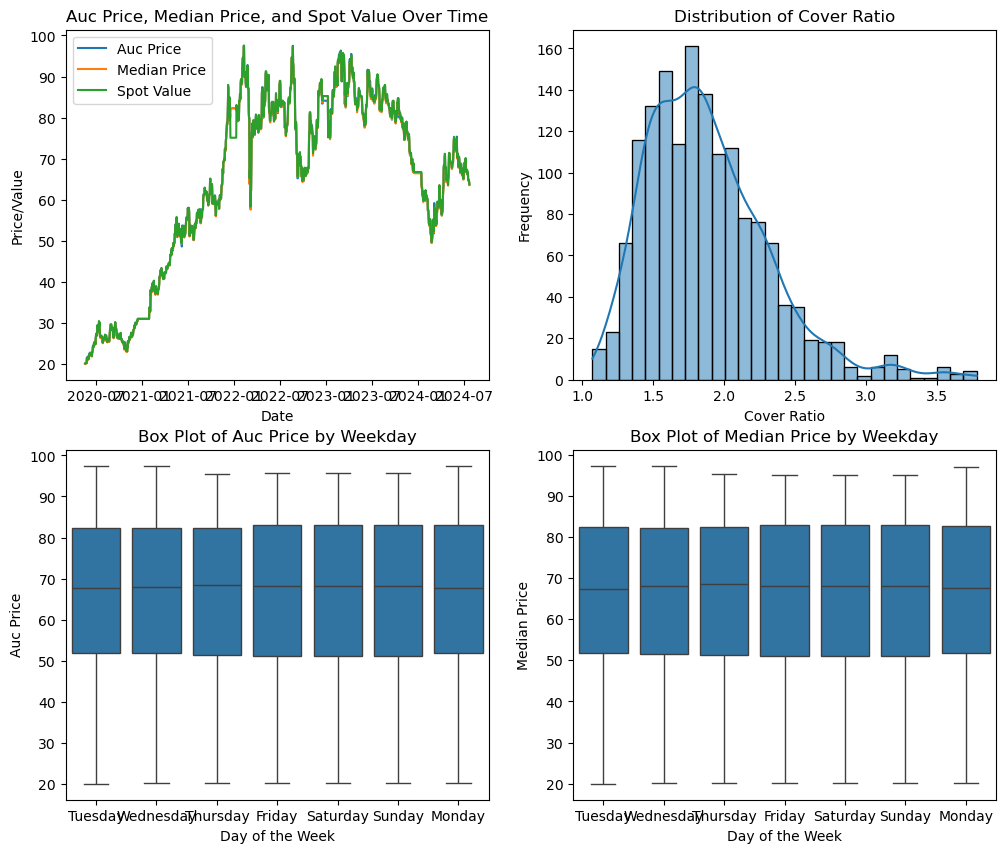

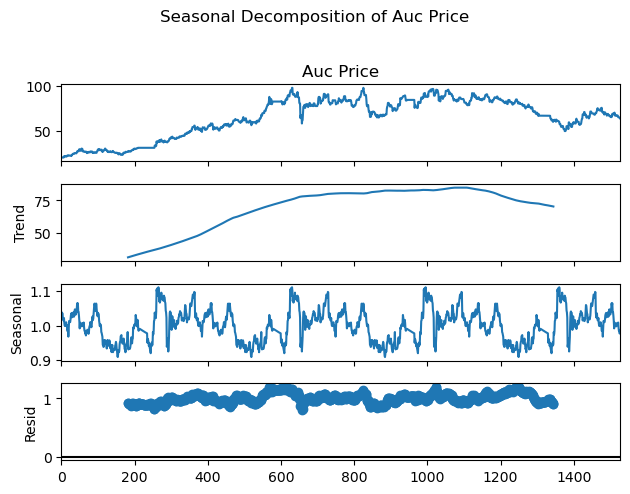

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'date' column is in datetime format (replace 'date_column_name' with your actual date column)
df = df_clean.reset_index().copy()
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Line Plot for Auc Price, Median Price, and Spot Value
axs[0, 0].plot(df['Date'], df['Auc Price'], label='Auc Price')
axs[0, 0].plot(df['Date'], df['Median Price'], label='Median Price')
axs[0, 0].plot(df['Date'], df['Spot Value'], label='Spot Value')
axs[0, 0].set_title('Auc Price, Median Price, and Spot Value Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price/Value')
axs[0, 0].legend()

# 2. Distribution of Cover Ratio
sns.histplot(df['Cover Ratio'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Cover Ratio')
axs[0, 1].set_xlabel('Cover Ratio')
axs[0, 1].set_ylabel('Frequency')

# 3. Box Plot of Auc Price by Weekday
sns.boxplot(x='day_name', y='Auc Price', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Auc Price by Weekday')
axs[1, 0].set_xlabel('Day of the Week')
axs[1, 0].set_ylabel('Auc Price')

# 4. Box Plot of Median Price by Weekday
sns.boxplot(x='day_name', y='Median Price', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Median Price by Weekday')
axs[1, 1].set_xlabel('Day of the Week')
axs[1, 1].set_ylabel('Median Price')

# 5. Box Plot of Spot Value by Weekday
# sns.boxplot(x='day_name', y='Spot Value', data=df, ax=axs[2, 0])
# axs[2, 0].set_title('Box Plot of Spot Value by Weekday')
# axs[2, 0].set_xlabel('Day of the Week')
# axs[2, 0].set_ylabel('Spot Value')

# 6. Seasonal Decomposition of Auc Price
result = seasonal_decompose(df['Auc Price'], model='multiplicative', period=365)
result.plot()
plt.suptitle('Seasonal Decomposition of Auc Price', y=1.02)  # Optional title adjustment

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Visualization Insights

### 1. Auc Price, Median Price, and Spot Value Over Time (Top Left)
- **Insight:** This line plot shows how the three key variables (Auc Price, Median Price, and Spot Value) have changed over time. It can be used to identify trends, spikes, or other significant changes.

### 2. Distribution of Cover Ratio (Top Right)
- **Insight:** The histogram shows the distribution of the cover ratio across the dataset. The added KDE (Kernel Density Estimate) line provides a smooth estimate of the distribution. Most of the cover ratios seem to be clustered around a specific range, which could indicate a common pattern in market behavior.

### 3. Box Plot of Auc Price by Weekday (Bottom Left)
- **Insight:** This box plot breaks down Auc Price by the day of the week. It shows the median, interquartile range, and outliers for each day, giving insight into how the Auc Price might fluctuate depending on the day of the week.

### 4. Box Plot of Median Price by Weekday (Bottom Center)
- **Insight:** Similar to the Auc Price box plot, but for Median Price. This can help in comparing how these two prices behave across different days.

### 5. Seasonal Decomposition of Auc Price (Bottom)
- **Insight:** The decomposition plot shows the original Auc Price time series, along with its estimated trend, seasonal component, and residuals (what’s left after removing the trend and seasonality). This breakdown is crucial for understanding underlying patterns and for further time-series modeling.

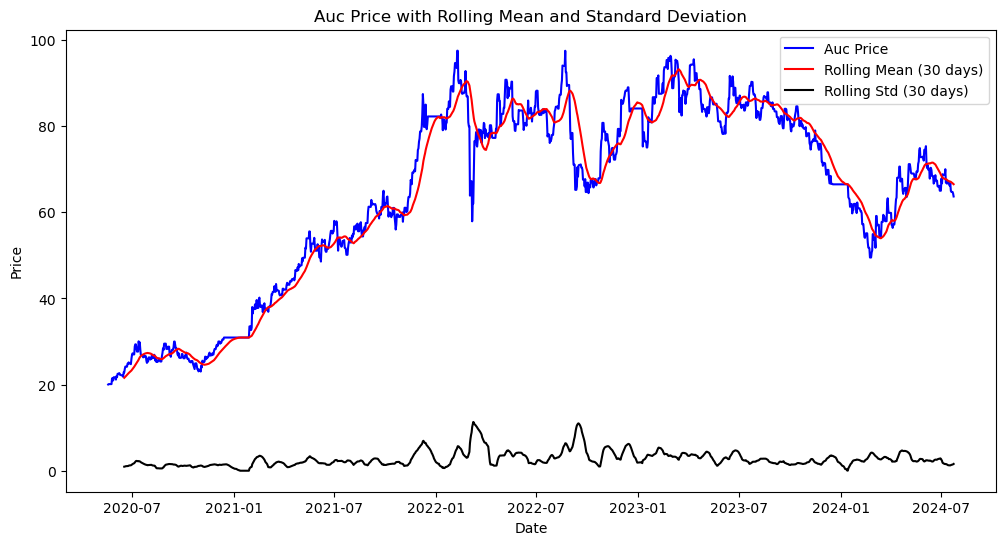

In [43]:
# Rolling mean and standard deviation for Auc Price
rolling_mean = df['Auc Price'].rolling(window=30).mean()
rolling_std = df['Auc Price'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Auc Price'], label='Auc Price', color='blue')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(df['Date'], rolling_std, label='Rolling Std (30 days)', color='black')
plt.title('Auc Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

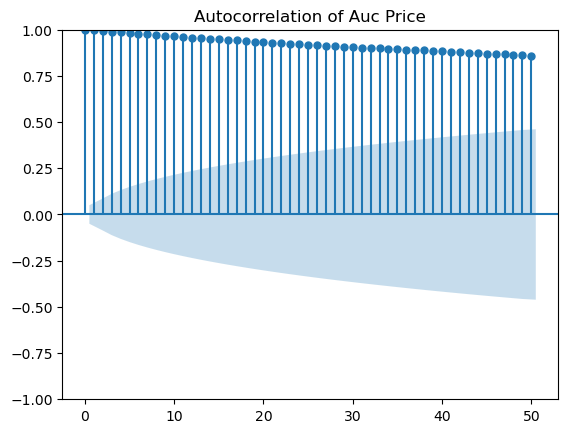

<Figure size 1200x600 with 0 Axes>

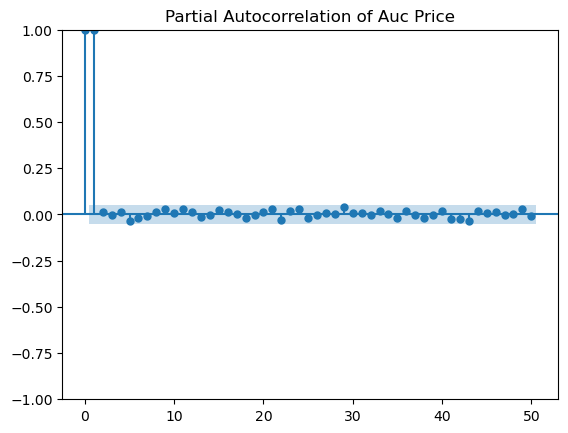

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_acf(df['Auc Price'], lags=50)
plt.title('Autocorrelation of Auc Price')
plt.show()

# Partial Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_pacf(df['Auc Price'], lags=50)
plt.title('Partial Autocorrelation of Auc Price')
plt.show()

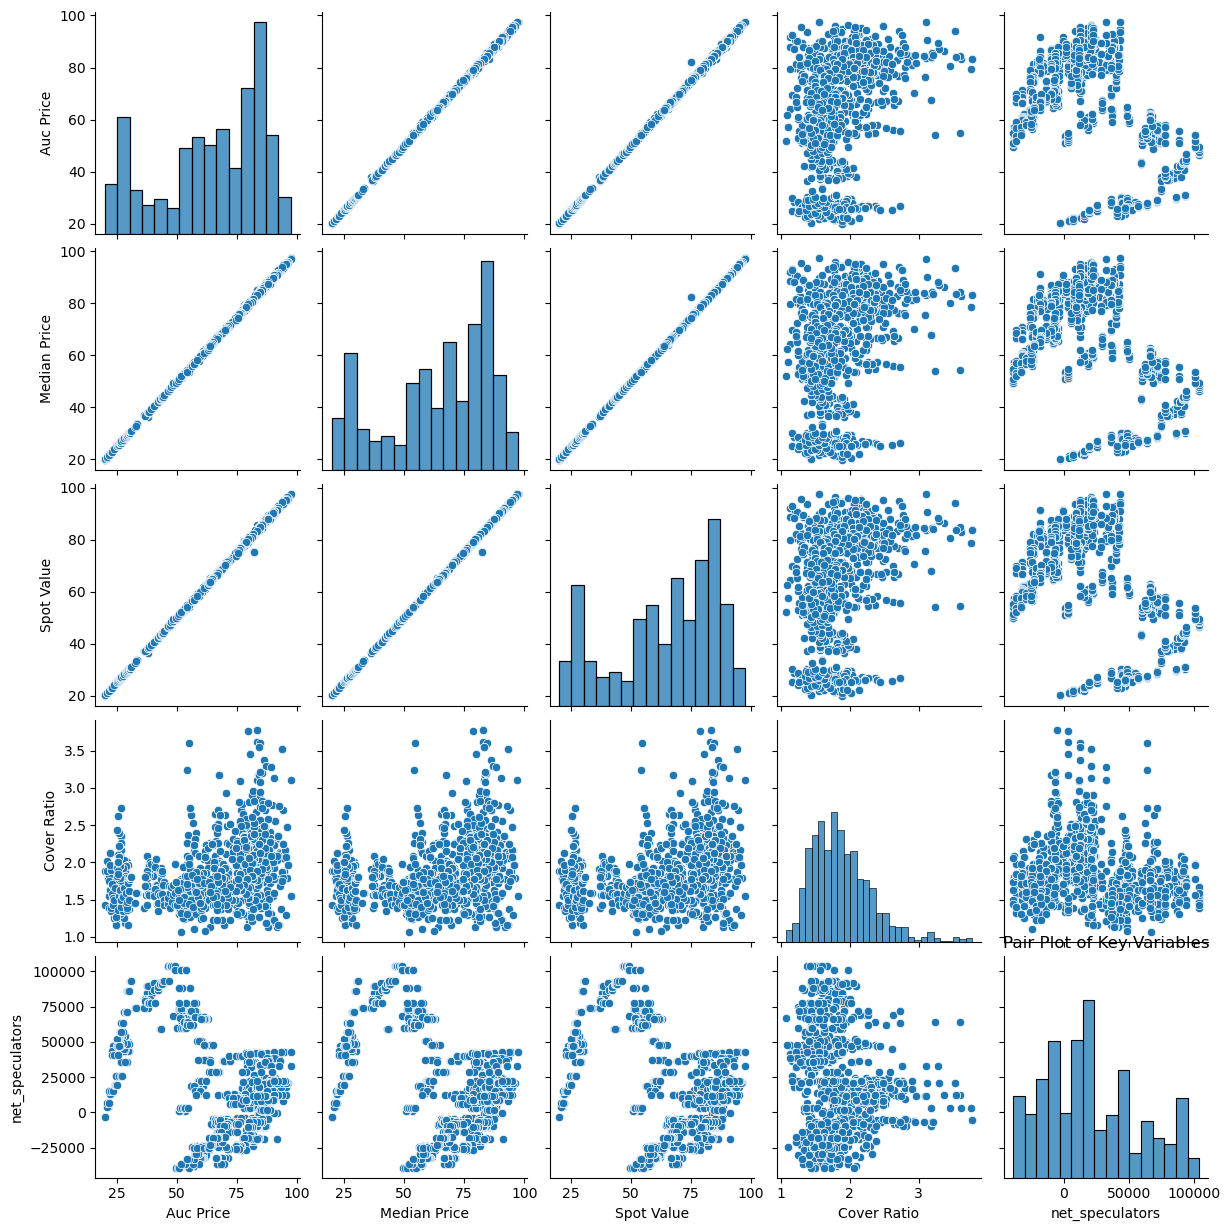

In [45]:
sns.pairplot(df[['Auc Price', 'Median Price', 'Spot Value', 'Cover Ratio', 'net_speculators']])
plt.title('Pair Plot of Key Variables')
plt.show()

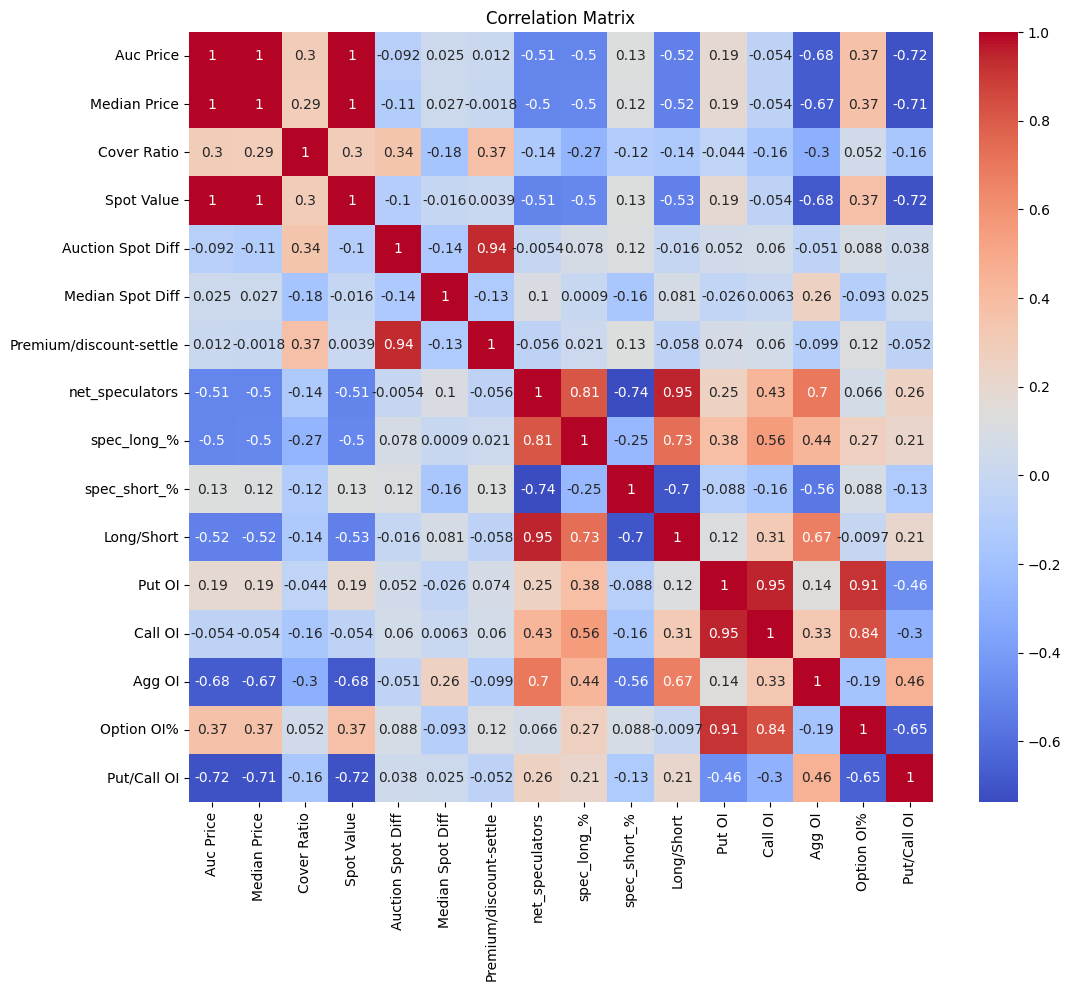

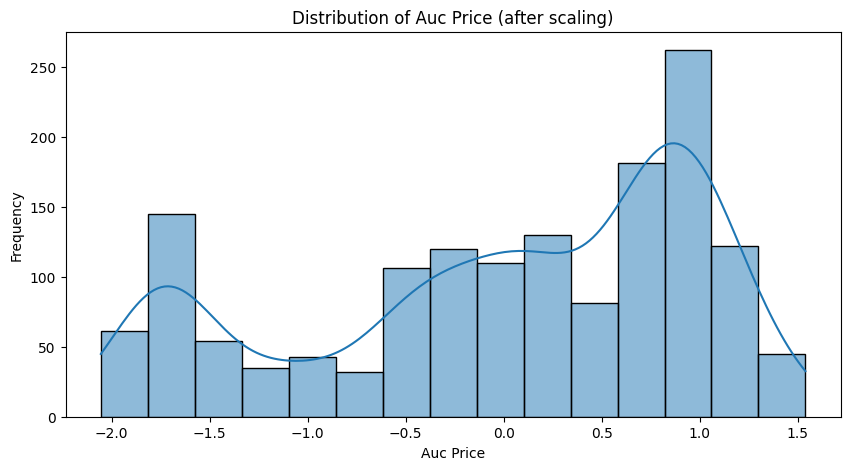

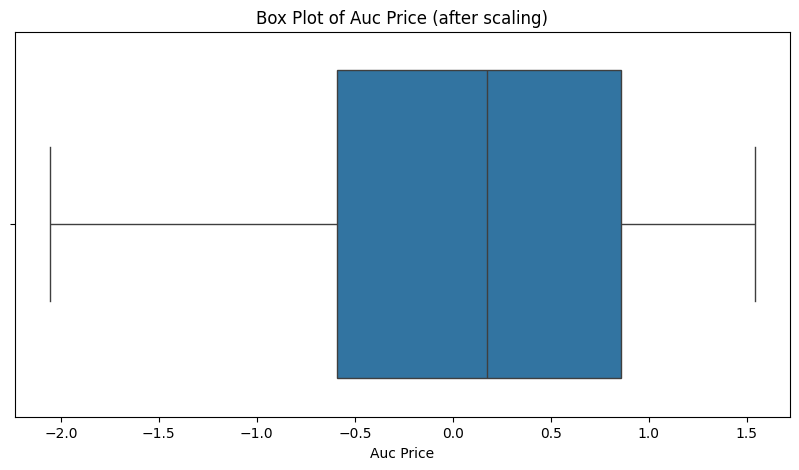

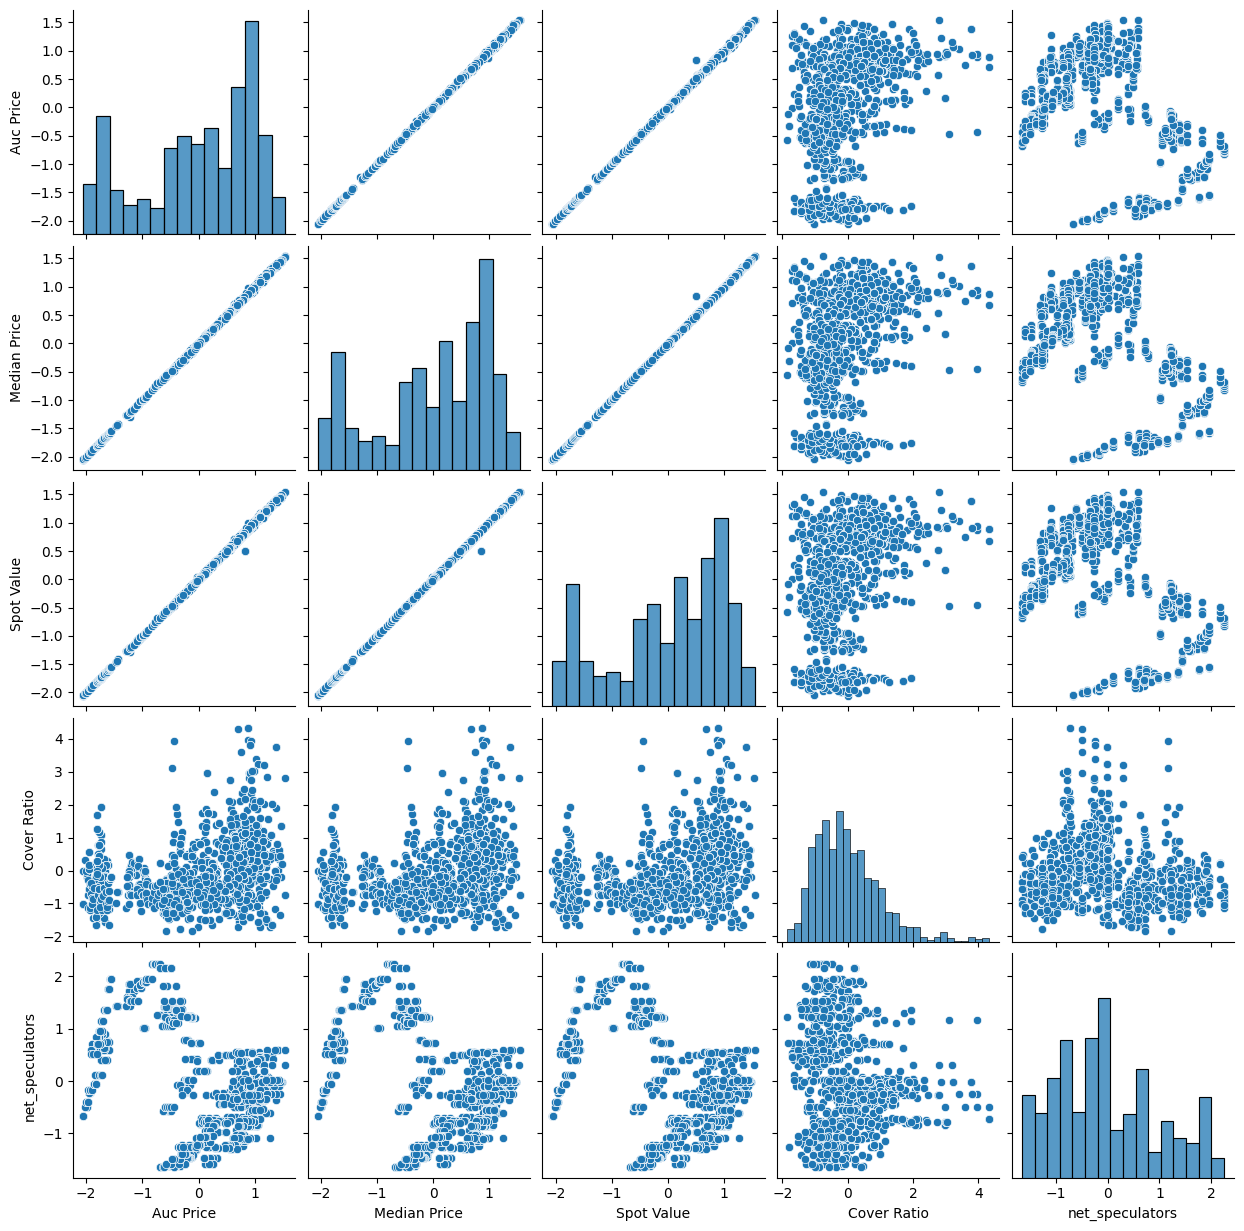

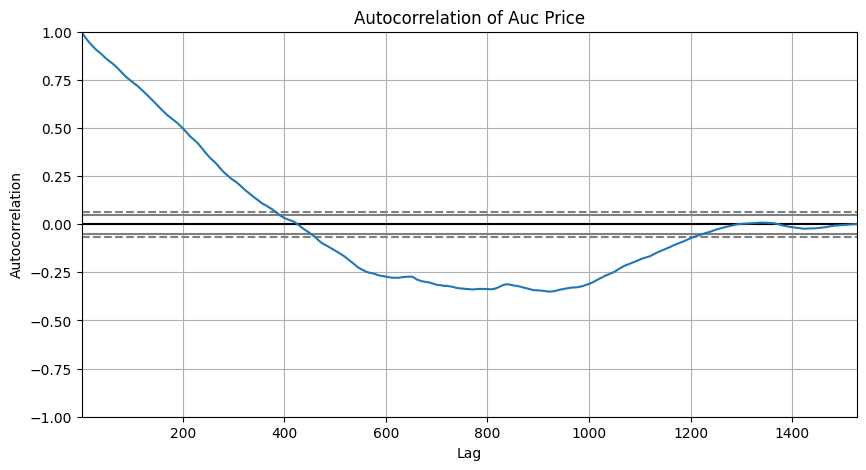

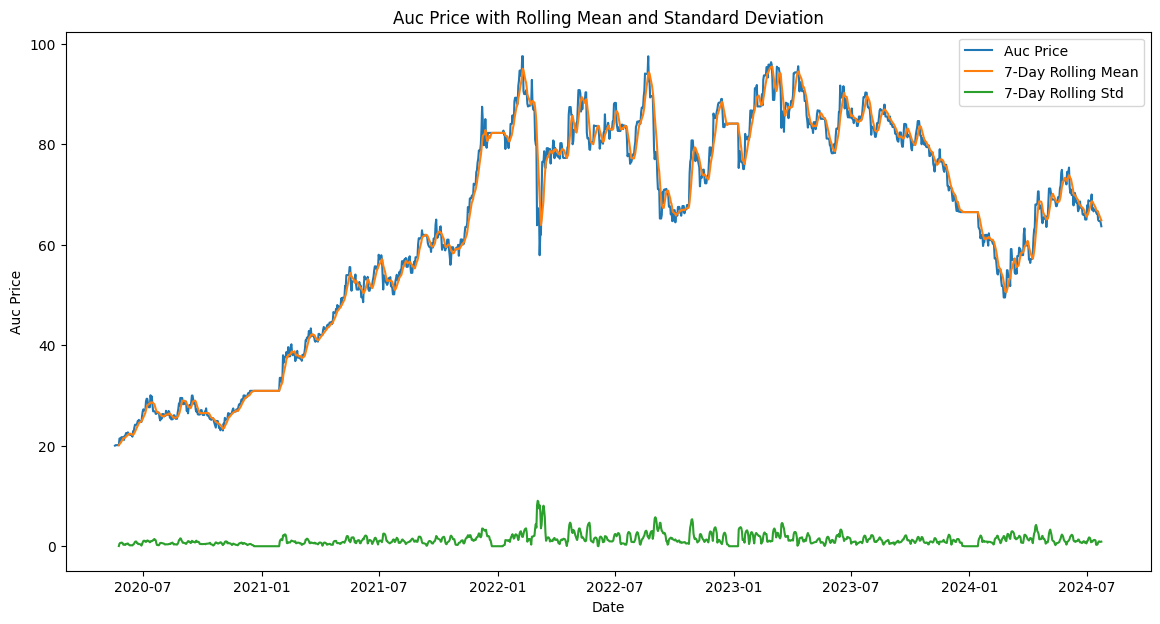

In [128]:
# Drop rows with missing values
data.dropna(inplace=True)

# Optionally, scale the data for better interpretability in correlation plots
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Auc Price', 'Median Price', 'Cover Ratio', 'Spot Value', 
                      'Auction Spot Diff', 'Median Spot Diff', 'Premium/discount-settle', 
                      'net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short', 
                      'Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI']

# Standardize the numerical features
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_features] = scaler.fit_transform(data[numerical_features])

# Correlation Matrix

correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Auc Price (after scaling)
plt.figure(figsize=(10, 5))
sns.histplot(data_scaled['Auc Price'], kde=True)
plt.title('Distribution of Auc Price (after scaling)')
plt.xlabel('Auc Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot to Identify Outliers (after scaling)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_scaled['Auc Price'])
plt.title('Box Plot of Auc Price (after scaling)')
plt.xlabel('Auc Price')
plt.show()

# Pair Plot for Visualizing Relationships (after scaling)
sns.pairplot(data_scaled[['Auc Price', 'Median Price', 'Spot Value', 'Cover Ratio', 'net_speculators']])
plt.show()

# Autocorrelation Plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(data['Auc Price'])  # Use original data for autocorrelation plot
plt.title('Autocorrelation of Auc Price')
plt.show()

# Rolling Mean and Standard Deviation (after scaling)
rolling_mean = data['Auc Price'].rolling(window=7).mean()
rolling_std = data['Auc Price'].rolling(window=7).std()

plt.figure(figsize=(14, 7))
plt.plot(data['Auc Price'], label='Auc Price')
plt.plot(rolling_mean, label='7-Day Rolling Mean')
plt.plot(rolling_std, label='7-Day Rolling Std')
plt.title('Auc Price with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Auc Price')
plt.legend()
plt.show()

## Data Analysis Insights

### 1. Pair Plot of Key Variables

- **Insight:** The pair plot reveals the relationships between key variables (Auc Price, Median Price, Spot Value, Cover Ratio, net_speculators).
- **Observations:**
  - Auc Price, Median Price, and Spot Value are highly correlated, as expected, since they all represent pricing metrics. The scatter plots between these variables show a strong linear relationship.
  - Cover Ratio and net_speculators do not have a clear linear relationship with the price variables, suggesting that other factors or nonlinear relationships may be at play.

### 2. Autocorrelation and Partial Autocorrelation Plots of Auc Price

- **Autocorrelation Plot:**
  - **Insight:** The autocorrelation plot shows a strong, gradually decreasing autocorrelation with lags, indicating that Auc Price is highly correlated with its past values.
  - **Use:** This strong autocorrelation is crucial for time series forecasting models like ARIMA or Prophet, where the past values are used to predict future values.

- **Partial Autocorrelation Plot:**
  - **Insight:** The partial autocorrelation drops sharply after the first lag, indicating that most of the correlation is captured by the immediate previous value.
  - **Use:** This suggests that a first-order autoregressive (AR) model might be appropriate, which will inform the choice of parameters for ARIMA.

### 3. Rolling Mean and Standard Deviation of Auc Price

- **Insight:** The rolling mean shows the overall trend of Auc Price over time, while the rolling standard deviation indicates the volatility.
- **Observations:**
  - The rolling mean shows a clear upward trend initially, followed by some stabilization and a slight decline.
  - The rolling standard deviation is relatively stable, with some spikes in volatility, which might correspond to market events or anomalies.
- **Use:** This visualization helps in understanding the stability of the time series and identifying periods of high volatility that could affect model performance.

### 4. Correlation Matrix

- **Insight:** The correlation matrix provides a visual representation of how each variable is related to the others.
- **Observations:**
  - Strong correlations between Auc Price, Median Price, and Spot Value, as seen before.
  - net_speculators has a negative correlation with Auc Price, suggesting that an increase in speculators might lead to a decrease in auction prices.
  - Put/Call OI is negatively correlated with Auc Price, indicating that the ratio of put to call options might have an inverse relationship with price movements.
- **Use:** These insights are useful for feature selection, as they indicate which variables might be most relevant for predicting Auc Price.

In [52]:
df_clean.loc[:, 'day_name'] = df_clean['Date'].dt.day.values

In [59]:
df_clean['day_name'] = df_clean['day_name'].astype(int)

In [63]:
df_clean['week'] = df_clean['week'].astype(int)

In [69]:

numerical_features = ['Auc Price', 'Median Price', 'Cover Ratio', 'Spot Value', 
                      'Auction Spot Diff', 'Median Spot Diff', 'Premium/discount-settle', 
                      'net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short', 
                      'Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI']


df_clean[numerical_features]

Auc Price  Median Price  Cover Ratio  Spot Value  Auction Spot Diff  \
0         20.02         19.97         1.88       20.04              -0.02   
1         20.11         20.06         1.43       20.16              -0.05   
2         20.11         20.06         1.43       20.16              -0.05   
3         20.11         20.06         1.43       20.16              -0.05   
4         20.11         20.06         1.43       20.16              -0.05   
...         ...           ...          ...         ...                ...   
1522      64.73         64.48         2.24       64.72               0.01   
1523      64.73         64.48         2.24       64.72               0.01   
1524      64.73         64.48         2.24       64.72               0.01   
1525      64.37         64.02         1.68       64.25               0.12   
1526      63.67         63.54         1.60       63.72              -0.05   

      Median Spot Diff  Premium/discount-settle  net_speculators  spec_long_%  \
0                -0.07                -0.000998         -3148.75         7.27   
1                -0.10                -0.002480         -3148.75         7.27   
2                -0.10                -0.002480         -3148.75         7.27   
3                -0.10                -0.002480         -3148.75         7.27   
4                -0.10                -0.002480         -3148.75         7.27   
...                ...                      ...              ...          ...   
1522             -0.24                 0.000155        -23378.80         5.18   
1523             -0.24                 0.000155        -23378.80         5.18   
1524             -0.24                 0.000155        -23378.80         5.18   
1525             -0.23                 0.001868        -23378.80         5.18   
1526             -0.18                -0.000785        -23378.80         5.18   

      spec_short_%  Long/Short    Put OI   Call OI    Agg OI  Option OI%  \
0             7.83    0.928480    4000.0   14525.0  867302.0    0.020913   
1             7.83    0.928480    4000.0   17275.0  868328.0    0.023915   
2             7.83    0.928480    4000.0   17275.0  868328.0    0.023915   
3             7.83    0.928480    4000.0   17275.0  868328.0    0.023915   
4             7.83    0.928480    4000.0   17275.0  868328.0    0.023915   
...            ...         ...       ...       ...       ...         ...   
1522          8.33    0.621849  208254.0  326942.0  730973.0    0.422689   
1523          8.33    0.621849  208254.0  326942.0  730973.0    0.422689   
1524          8.33    0.621849  208254.0  326942.0  730973.0    0.422689   
1525          8.33    0.621849  209514.0  329792.0  737235.0    0.422474   
1526          8.33    0.621849  210329.0  332927.0  740525.0    0.423169   

      Put/Call OI  
0        3.631250  
1        4.318750  
2        4.318750  
3        4.318750  
4        4.318750  
...           ...  
1522     1.569919  
1523     1.569919  
1524     1.569919  
1525     1.574081  
1526     1.582887  

[1527 rows x 16 columns]

In [79]:
# Create the percentage difference column
df_clean.loc[:, 'Pct_Change_Auc_Price'] = df_clean['Auc Price'].pct_change() * 100

# Drop the first row as it will have a NaN value due to the pct_change calculation
df_clean = df_clean.dropna(subset=['Pct_Change_Auc_Price'])

# Display the first few rows to verify
print(df_clean[['Date', 'Auc Price', 'Pct_Change_Auc_Price']].head())

# Update features for modeling
target = 'Pct_Change_Auc_Price'
features = df_clean.drop(columns=['Date', 'Auc Price', target]).columns

        Date  Auc Price  Pct_Change_Auc_Price
4 2020-05-23      20.11              0.000000
5 2020-05-24      20.11              0.000000
6 2020-05-25      20.11              0.000000
7 2020-05-26      21.45              6.663352
8 2020-05-27      21.45              0.000000


In [ ]:
df_clean

In [83]:
df_clean = df_clean.set_index('Date').resample('W').mean().reset_index()

In [84]:
# Create the percentage difference column
df_clean.loc[:, 'Pct_Change_Auc_Price'] = df_clean['Auc Price'].pct_change() * 100

# Drop the first row as it will have a NaN value due to the pct_change calculation
df_clean = df_clean.dropna(subset=['Pct_Change_Auc_Price'])

# Display the first few rows to verify
print(df_clean[['Date', 'Auc Price', 'Pct_Change_Auc_Price']].head())

# Update features for modeling
target = 'Pct_Change_Auc_Price'
features = df_clean.drop(columns=['Date', 'Auc Price', target]).columns

        Date  Auc Price  Pct_Change_Auc_Price
1 2020-05-31  21.294286              5.889039
2 2020-06-07  22.014286              3.381189
3 2020-06-14  22.272857              1.174562
4 2020-06-21  23.378571              4.964403
5 2020-06-28  24.814286              6.141155


In [87]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

# Define target and features
# df_clean = df_clean.reset_index()
# target = 'Auc Price'
# features = df_clean.drop(columns=['Date', 'Median Price', 'Spot Value', target]).columns
# features = df_clean[numerical_features].drop(columns=['Auc Price', 'Median Price', 'Spot Value']).columns

# Split the data into training and testing sets
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance from RandomForest
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance from RandomForest:")
print(feature_importances)

# SHAP analysis
# explainer = shap.Explainer(rf_model, X_train)
# shap_values = explainer(X_test)

# # SHAP summary plot
# shap.summary_plot(shap_values, X_test)


# SHAP analysis with additivity check disabled
explainer = shap.Explainer(rf_model, X_train, check_additivity=False)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# SHAP dependence plot for the most important feature
shap.dependence_plot(feature_importances.iloc[0]['Feature'], shap_values, X_test)



Feature Importance from RandomForest:
                         Feature  Importance
4               Median Spot Diff    0.073641
40                      day_name    0.067920
7                    spec_long_%    0.061601
1                    Cover Ratio    0.051909
11                       Call OI    0.051774
29           Median_Price_Lag_14    0.051666
13                    Option OI%    0.051371
5        Premium/discount-settle    0.040050
8                   spec_short_%    0.040011
30             Spot_Value_Lag_14    0.039832
15                          week    0.038541
9                     Long/Short    0.033960
3              Auction Spot Diff    0.033903
12                        Agg OI    0.031803
14                   Put/Call OI    0.031178
10                        Put OI    0.030461
28              Auc_Price_Lag_14    0.030096
2                     Spot Value    0.030090
6                net_speculators    0.027308
25               Auc_Price_Lag_7    0.024904
26            Med

TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

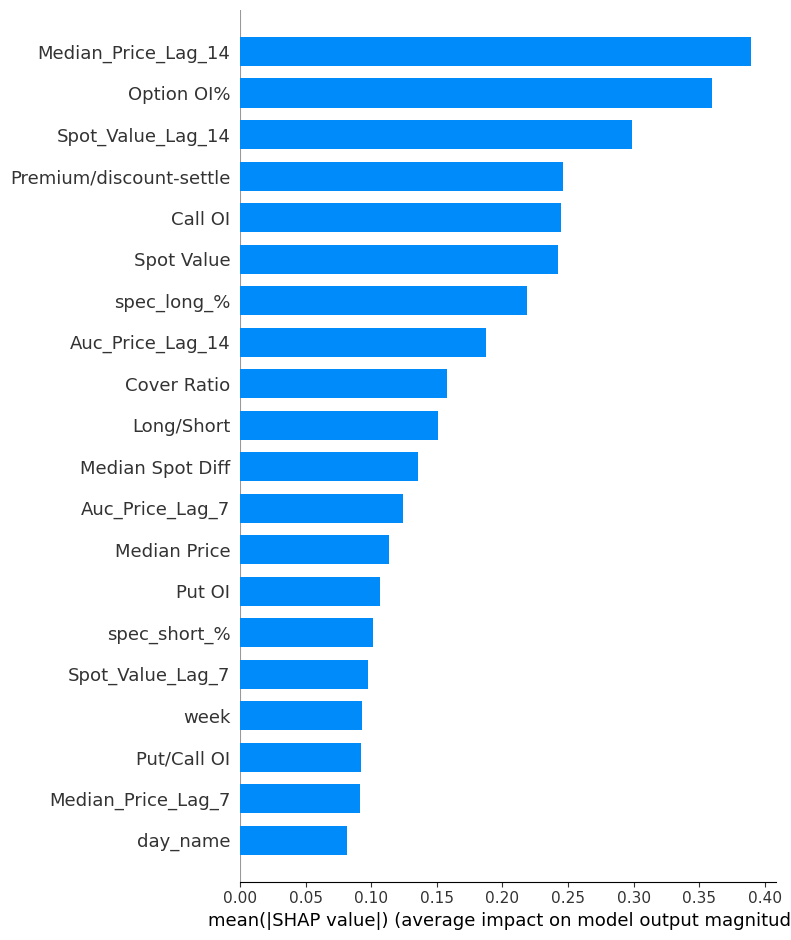

In [103]:
explainer = shap.TreeExplainer(rf_model) 
single_shap_value = explainer(X_test.sample(n=10))
shap.summary_plot(single_shap_value, feature_names=X_test.columns, plot_type='bar')
plt.show()

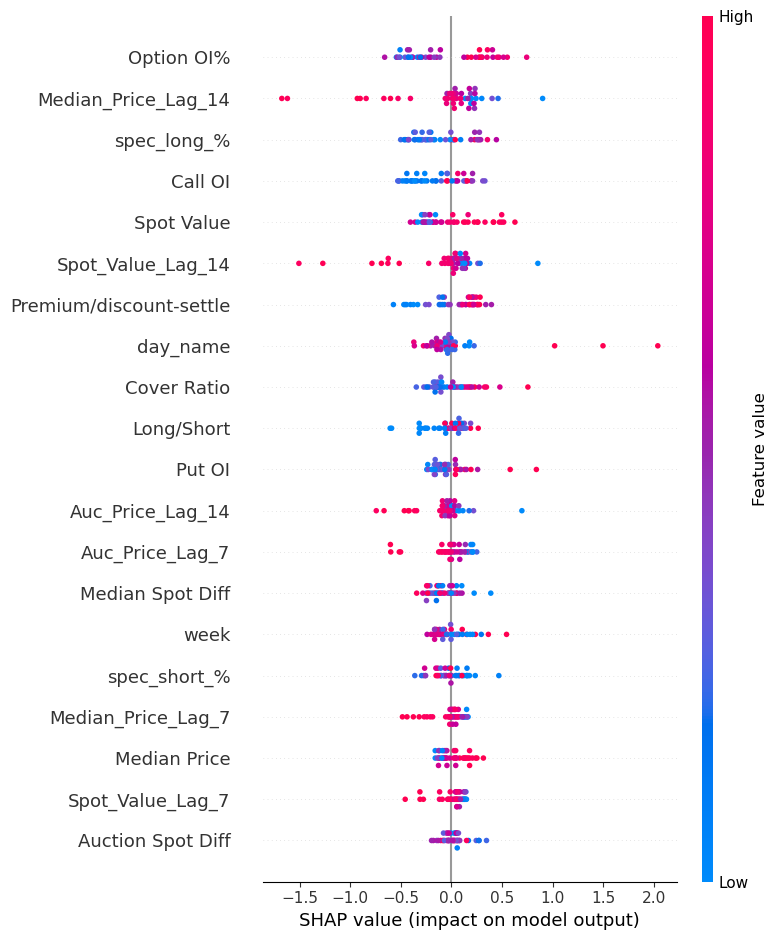

In [96]:
# Visualize all values
shap_values = explainer(X_test)
shap.summary_plot(shap_values, feature_names=X_test.columns)
plt.show()

Feature Importance from XGBoost:


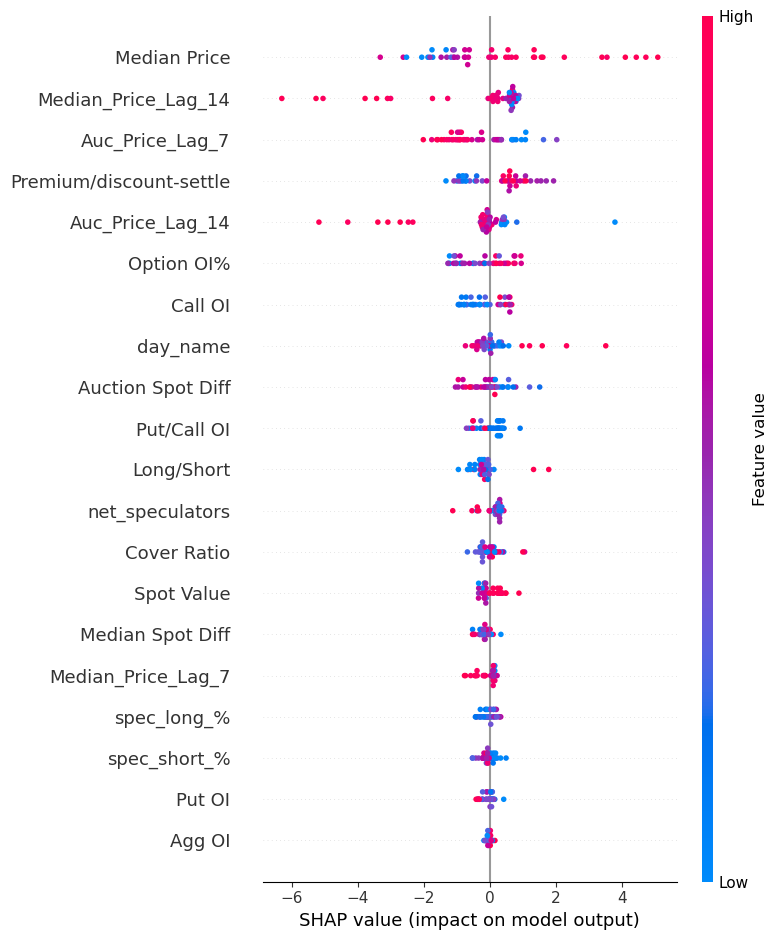

In [104]:
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance from XGBoost:")
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_test)

shap.summary_plot(shap_values_xgb, X_test)

## SHAP Analysis Insights

### 1. SHAP Summary Plot (Beeswarm)

- **Overview:** This plot shows the impact of each feature on the model’s output across all samples.
- **Key Insights:**
  - **Top Features:**
    - `Median_Price_Lag_14`, `Option OI%`, and `Spot_Value_Lag_14` are the most impactful features, suggesting that the model relies heavily on these lagged and option-related features to make predictions about the percentage change in Auc Price.
    - `Premium/discount-settle` and `Call OI` also play significant roles.
  - **Feature Impact:**
    - The spread of SHAP values along the x-axis for each feature indicates how much that feature contributes to the prediction. Features with a wider spread have more influence on the prediction.
    - The color represents the feature value (red for high, blue for low). For example, a high `Option OI%` tends to have a positive impact on the predicted percentage change.

### 2. SHAP Bar Plot (Average Impact)

- **Overview:** This bar plot summarizes the mean absolute SHAP value for each feature, providing a clear ranking of feature importance.
- **Key Insights:**
  - **Top-Ranked Features:**
    - `Median_Price_Lag_14` has the highest average impact on model predictions, followed closely by `Option OI%` and `Spot_Value_Lag_14`.
    - The importance of these features is consistent with the beeswarm plot, confirming their significance in predicting percentage changes in Auc Price.
  - **Relative Importance:**
    - The bar lengths provide a clear visual comparison of how much each feature contributes to the model, helping prioritize features for further analysis or potential feature engineering.

# XGBoost and Random Forest

In [105]:
# Selected features based on SHAP analysis
selected_features = [
    'Median_Price_Lag_14', 'Option OI%', 'Spot_Value_Lag_14', 
    'Premium/discount-settle', 'Call OI', 'Spot Value', 'spec_long_%'
]

# Define target
target = 'Pct_Change_Auc_Price'

# Prepare the data
X_selected = df_clean[selected_features]
y = df_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Date  net_speculators  spec_long_%  spec_short_%  Long/Short  \
0   2018-01-19         55281.97         7.42          0.08         NaN   
1   2018-01-26         55412.89         7.37          0.05         NaN   
2   2018-02-02         56881.56         5.97          0.11         NaN   
3   2018-02-09         43466.55         6.11          0.11         NaN   
4   2018-02-16         44053.00         6.10          0.13         NaN   
..         ...              ...          ...           ...         ...   
340 2024-06-21        -18197.75         4.43          6.89    0.642961   
341 2024-06-28        -21215.03         5.13          8.23    0.623329   
342 2024-07-05        -17487.03         5.22          7.67    0.680574   
343 2024-07-12        -18113.99         5.00          7.48    0.668449   
344 2024-07-19        -23378.80         5.18          8.33    0.621849   

      1M Trend     3M Trend      6M Trend  1M Trend.1  3M Trend.1  6M Trend.1  \
0          NaN          NaN           NaN         NaN         NaN         NaN   
1          NaN          NaN           NaN         NaN         NaN         NaN   
2          NaN          NaN           NaN         NaN         NaN         NaN   
3          NaN          NaN           NaN         NaN         NaN         NaN   
4          NaN          NaN           NaN         NaN         NaN         NaN   
..         ...          ...           ...         ...         ...         ...   
340 -1214.9725  9166.439808  13628.133056    -0.43500   -1.563942   -1.679028   
341 -5672.9975  3662.514423   9676.096019    -0.59000   -1.482115   -1.757315   
342 -7989.4375   -60.389808   6918.804722    -0.63625   -1.419135   -1.831898   
343 -9200.6050 -2403.455385   4933.275926    -0.50750   -1.287596   -1.824676   
344 -7617.8300 -4113.014808   3105.754167     0.10625   -0.715385   -1.515741   

     1M Trend.2  3M Trend.2  6M Trend.2  
0           NaN         NaN         NaN  
1           NaN         NaN         NaN  
2           NaN         NaN         NaN  
3           NaN         NaN         NaN  
4           NaN         NaN         NaN  
..          ...         ...         ...  
340   -0.028285    0.112847    0.179104  
341   -0.110606    0.027996    0.111385  
342   -0.152290   -0.029082    0.066476  
343   -0.167398   -0.060957    0.038296  
344   -0.114165   -0.067919    0.029234  

[345 rows x 14 columns]

In [169]:
auction_df

Date  Auc Price  Median Price  Cover Ratio  Spot Value  \
0    2018-06-04      15.28         15.23         1.98       15.28   
1    2018-06-05      16.35         16.33         2.28       16.42   
2    2018-06-06      15.70         15.68         2.31       15.81   
3    2018-06-07      16.14         15.99         2.32       16.04   
4    2018-06-08      15.78         15.80         1.77       15.87   
...         ...        ...           ...          ...         ...   
1301 2024-07-17      66.66         66.29         1.81       66.47   
1302 2024-07-18      64.96         64.92         1.53       65.05   
1303 2024-07-19      64.73         64.48         2.24       64.72   
1304 2024-07-22      64.37         64.02         1.68       64.25   
1305 2024-07-23      63.67         63.54         1.60       63.72   

      Auction Spot Diff  Median Spot Diff  Premium/discount-settle  
0                  0.00             -0.05                      NaN  
1                 -0.07             -0.09                      NaN  
2                 -0.11             -0.13                      NaN  
3                  0.10             -0.05                      NaN  
4                 -0.09             -0.07                -0.005671  
...                 ...               ...                      ...  
1301               0.19             -0.18                 0.002858  
1302              -0.09             -0.13                -0.001384  
1303               0.01             -0.24                 0.000155  
1304               0.12             -0.23                 0.001868  
1305              -0.05             -0.18                -0.000785  

[1306 rows x 8 columns]

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForest and XGBoost models using the scaled data
rf_model.fit(X_train_scaled, y_train)
y_pred_rf_scaled = rf_model.predict(X_test_scaled)

# Evaluate the scaled RandomForest model
mae_rf_scaled = mean_absolute_error(y_test, y_pred_rf_scaled)
rmse_rf_scaled = np.sqrt(mean_squared_error(y_test, y_pred_rf_scaled))
r2_rf_scaled = r2_score(y_test, y_pred_rf_scaled)

print(f"RandomForest MAE (Scaled): {mae_rf_scaled:.4f}")
print(f"RandomForest RMSE (Scaled): {rmse_rf_scaled:.4f}")
print(f"RandomForest R² (Scaled): {r2_rf_scaled:.4f}")

# Train the XGBoost model using the scaled data
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb_scaled = xgb_model.predict(X_test_scaled)

# Evaluate the scaled XGBoost model
mae_xgb_scaled = mean_absolute_error(y_test, y_pred_xgb_scaled)
rmse_xgb_scaled = np.sqrt(mean_squared_error(y_test, y_pred_xgb_scaled))
r2_xgb_scaled = r2_score(y_test, y_pred_xgb_scaled)

print(f"XGBoost MAE (Scaled): {mae_xgb_scaled:.4f}")
print(f"XGBoost RMSE (Scaled): {rmse_xgb_scaled:.4f}")
print(f"XGBoost R² (Scaled): {r2_xgb_scaled:.4f}")

RandomForest MAE (Scaled): 2.7090
RandomForest RMSE (Scaled): 3.2826
RandomForest R² (Scaled): 0.4712
XGBoost MAE (Scaled): 2.6617
XGBoost RMSE (Scaled): 3.3805
XGBoost R² (Scaled): 0.4392


In [108]:
# Assuming df_clean is your resampled weekly data

# Create lag features for multi-step forecasting
df_clean['Auc_Price_Lag_1'] = df_clean['Pct_Change_Auc_Price'].shift(1)
df_clean['Auc_Price_Lag_2'] = df_clean['Pct_Change_Auc_Price'].shift(2)
df_clean['Auc_Price_Lag_3'] = df_clean['Pct_Change_Auc_Price'].shift(3)

# Drop rows with NaN values due to lagging
df_clean = df_clean.dropna()

# Define features and target
features = ['Auc_Price_Lag_1', 'Auc_Price_Lag_2', 'Auc_Price_Lag_3']
target = 'Pct_Change_Auc_Price'

X = df_clean[features]
y = df_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [109]:
# Train a RandomForest model for multi-step forecasting
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an XGBoost model for comparison
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [110]:
# Create a placeholder for storing the predictions
future_predictions_rf = []
future_predictions_xgb = []

# Use the last available data point to start forecasting
last_known_input = X_test.iloc[-1].values.reshape(1, -1)

# RandomForest Multi-Step Forecast
for i in range(3):  # Forecast for the next 3 weeks
    next_week_rf = rf_model.predict(last_known_input)[0]
    future_predictions_rf.append(next_week_rf)
    
    # Update the input with the latest prediction (simulating the next week)
    last_known_input = np.roll(last_known_input, -1)
    last_known_input[0, -1] = next_week_rf

# XGBoost Multi-Step Forecast
last_known_input = X_test.iloc[-1].values.reshape(1, -1)  # Reset input for XGBoost
for i in range(3):  # Forecast for the next 3 weeks
    next_week_xgb = xgb_model.predict(last_known_input)[0]
    future_predictions_xgb.append(next_week_xgb)
    
    # Update the input with the latest prediction (simulating the next week)
    last_known_input = np.roll(last_known_input, -1)
    last_known_input[0, -1] = next_week_xgb

print("RandomForest Next 3 Weeks Predictions:", future_predictions_rf)
print("XGBoost Next 3 Weeks Predictions:", future_predictions_xgb)

RandomForest Next 3 Weeks Predictions: [np.float64(0.26735596083021335), np.float64(2.175695410964332), np.float64(-1.1064639191612269)]
XGBoost Next 3 Weeks Predictions: [np.float32(-1.3334574), np.float32(-1.8828584), np.float32(1.0939373)]


/opt/anaconda3/envs/junction/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [114]:
future_predictions_rf[0].item()

0.26735596083021335

In [116]:
future_predictions_rf = [r.item() for r in future_predictions_rf]

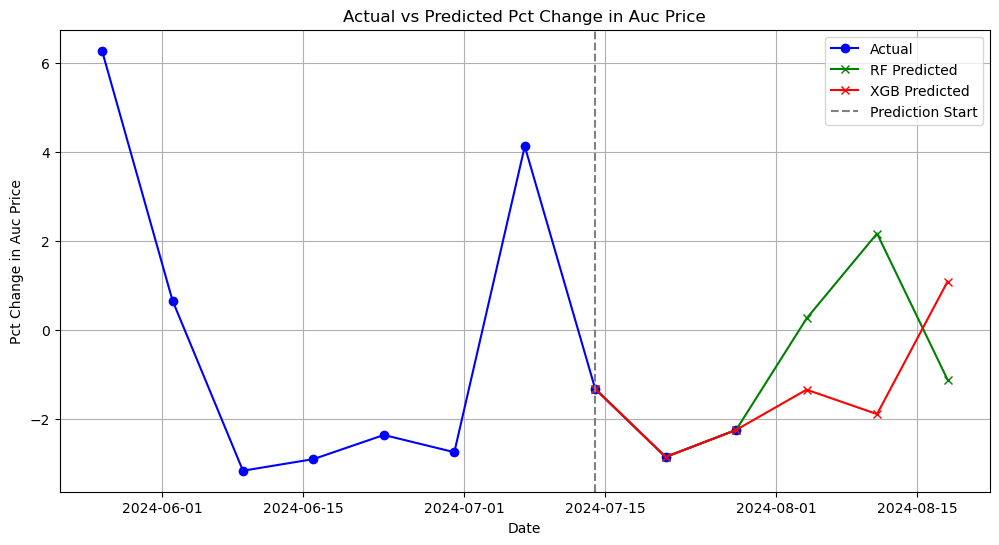

In [167]:
import matplotlib.pyplot as plt

# Assuming `future_predictions_rf` and `future_predictions_xgb` contain the predictions for the next 3 weeks
# Assuming `df_clean` is the DataFrame containing the actual data

# Get the last few weeks of actual data to plot for comparison
actual_data = df_clean[target].iloc[-10:].tolist()  # Adjust to include more weeks for context
actual_future_data = df_clean[target].iloc[-3:].tolist()

# Append the predictions to the actual data
rf_predictions = actual_data[-3:] + future_predictions_rf
xgb_predictions = actual_data[-3:] + future_predictions_xgb

# Create a list of dates for plotting
date_range = pd.date_range(start=df_clean['Date'].iloc[-10], periods=13, freq='W')

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))

plt.plot(date_range[:10], actual_data, label='Actual', color='blue', marker='o')
plt.plot(date_range[-6:], rf_predictions, label='RF Predicted', color='green', marker='x')
plt.plot(date_range[-6:], xgb_predictions, label='XGB Predicted', color='red', marker='x')

plt.axvline(x=date_range[7], color='gray', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Pct Change in Auc Price')
plt.title('Actual vs Predicted Pct Change in Auc Price')
plt.legend()
plt.grid(True)
plt.show()

# Facebook Prophet

In [143]:


# Prepare the data for Prophet
df_prophet = df_clean.iloc[:-4, ][['Date', 'Pct_Change_Auc_Price']].rename(columns={'Date': 'ds', 'Pct_Change_Auc_Price': 'y'})

# Train the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create a DataFrame to hold future dates (next 3 weeks)
future_dates = prophet_model.make_future_dataframe(periods=4, freq='W', include_history=False)

# Make predictions
forecast = prophet_model.predict(future_dates)

# Extract the relevant columns from the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

01:17:09 - cmdstanpy - INFO - Chain [1] start processing
01:17:10 - cmdstanpy - INFO - Chain [1] done processing


ds      yhat  yhat_lower  yhat_upper
1 2024-07-14 -2.566703   -8.045077    2.876616
2 2024-07-21 -3.962612   -9.350101    2.076376
3 2024-07-28 -3.494187   -9.310175    2.219040

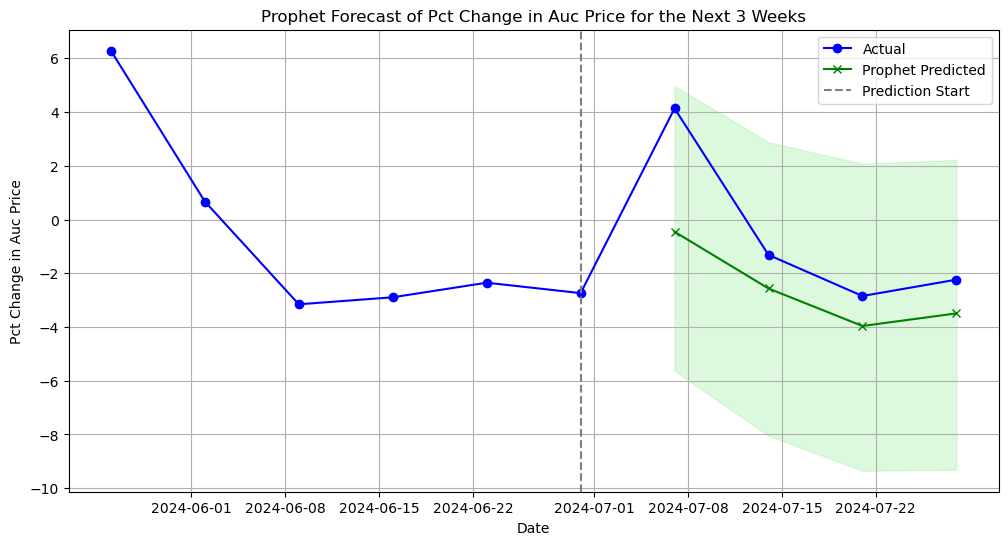

In [145]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_clean.iloc[-10:, ]['Date'], df_clean.iloc[-10:, ]['Pct_Change_Auc_Price'], label='Actual', color='blue', marker='o')

# Plot predictions
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Predicted', color='green', marker='x')

# Highlight the prediction area
plt.fill_between(forecast['ds'].tail(4), forecast['yhat_lower'].tail(4), forecast['yhat_upper'].tail(4), color='lightgreen', alpha=0.3)

# Add labels and title
plt.axvline(x=df_prophet['ds'].iloc[-1], color='gray', linestyle='--', label='Prediction Start')
plt.xlabel('Date')
plt.ylabel('Pct Change in Auc Price')
plt.title('Prophet Forecast of Pct Change in Auc Price for the Next 3 Weeks')
plt.legend()
plt.grid(True)
plt.show()

# LSTM Model

In [102]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [103]:
merged_df = merged_df.dropna()

In [106]:
merged_df = merged_df.dropna()
merged_df = merged_df.drop('day_name', axis=1)

In [112]:
merged_df = merged_df.drop('week', axis=1)

In [118]:
merged_df.columns

Index(['Date', 'Auc Price', 'Median Price', 'Cover Ratio', 'Spot Value',
       'Auction Spot Diff', 'Median Spot Diff', 'Premium/discount-settle',
       'net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short',
       'Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI',
       'Auc_Price_Lag_1', 'Median_Price_Lag_1', 'Spot_Value_Lag_1',
       'Auc_Price_Lag_2', 'Median_Price_Lag_2', 'Spot_Value_Lag_2',
       'Auc_Price_Lag_3', 'Median_Price_Lag_3', 'Spot_Value_Lag_3',
       'Auc_Price_Lag_7', 'Median_Price_Lag_7', 'Spot_Value_Lag_7',
       'Auc_Price_Lag_14', 'Median_Price_Lag_14', 'Spot_Value_Lag_14',
       'Auc_Price_Rolling_Mean_3', 'Median_Price_Rolling_Mean_3',
       'Spot_Value_Rolling_Mean_3', 'Auc_Price_Rolling_Mean_7',
       'Median_Price_Rolling_Mean_7', 'Spot_Value_Rolling_Mean_7',
       'Auc_Price_Rolling_Mean_14', 'Median_Price_Rolling_Mean_14',
       'Spot_Value_Rolling_Mean_14'],
      dtype='object')

In [119]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [122]:
# data = merged_df[['Date', 'Auc Price', 'Median Price', 'Cover Ratio', 'Spot Value',
#        'Auction Spot Diff', 'Median Spot Diff', 'Premium/discount-settle']].copy()

data = merged_df.copy()

In [123]:

data = merged_df.copy()
# Sorting the data by date
data.sort_values('Date', inplace=True)

# Fill missing values with the method of forward fill
data.fillna(method='ffill', inplace=True)

# Selecting relevant features
features = data[['Auc Price', 'Median Price', 'Cover Ratio', 'Spot Value', 'Auction Spot Diff', 'Median Spot Diff','Premium/discount-settle']]

# Normalize features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Define a function to create sequences
def create_sequences(input_data, target_column, sequence_length):
    sequences = []
    labels = []
    for i in range(len(input_data) - sequence_length):
        sequence = input_data[i:i+sequence_length]
        label = input_data[i + sequence_length, target_column]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 14  # Using the past 14 days to predict the next day
target_column = 0  # 'Auc Price' column index after feature selection
X, y = create_sequences(scaled_features, target_column, sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

X_train.shape, X_test.shape

/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_51448/1808847783.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


((1361, 14, 7), (152, 14, 7))

In [131]:
X_train.shape[2]

7

In [124]:
# Convert the features and targets into numpy arrays explicitly
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

In [132]:
# Print data types for each feature column
print(X_train.dtype, y_train.dtype)
print(X_train.shape, y_train.shape)

# Check for any non-float data
print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))
print(np.all(np.isfinite(X_train)), np.all(np.isfinite(y_train)))

float32 float32
(1361, 14, 7) (1361,)
False False
True True


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reinitializing the model
model = Sequential([
    LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Check model summary to ensure it's as expected
model.summary()

# Create a manual numpy array of the expected shape
manual_test_input = np.random.rand(1, X_train.shape[1], X_train.shape[2]).astype('float32')

# Attempt to make a prediction with the manual input
test_output = model.predict(manual_test_input)
print("Test output:", test_output)

/opt/anaconda3/envs/junction/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: object __array__ method not producing an array

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Initializing the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary to check the structure
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

/opt/anaconda3/envs/junction/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: object __array__ method not producing an array

In [87]:
X_train

array([[[0.00808693, 0.01327937, 0.        , ..., 0.40278855,
         0.4665127 , 0.10912955],
        [0.0060652 , 0.00429999, 0.22743683, ..., 0.40278855,
         0.4665127 , 0.10912955],
        [0.00796058, 0.00771468, 0.2166065 , ..., 0.40278855,
         0.4665127 , 0.10912955],
        ...,
        [0.00821329, 0.0093588 , 0.16606498, ..., 0.3361735 ,
         0.48267898, 0.08457358],
        [0.00821329, 0.0093588 , 0.16606498, ..., 0.3361735 ,
         0.48267898, 0.08457358],
        [0.01175133, 0.01214114, 0.24909747, ..., 0.3361735 ,
         0.48267898, 0.08457358]],

       [[0.0060652 , 0.00429999, 0.22743683, ..., 0.40278855,
         0.4665127 , 0.10912955],
        [0.00796058, 0.00771468, 0.2166065 , ..., 0.40278855,
         0.4665127 , 0.10912955],
        [0.01276219, 0.01087644, 0.37184116, ..., 0.35398915,
         0.53887606, 0.07529528],
        ...,
        [0.00821329, 0.0093588 , 0.16606498, ..., 0.3361735 ,
         0.48267898, 0.08457358],
        [0.0

In [148]:


# Ensure 'Date' column is in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Use MinMaxScaler to normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_clean['Pct_Change_Auc_Price_Scaled'] = scaler.fit_transform(df_clean[['Pct_Change_Auc_Price']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 4 weeks)
SEQ_LENGTH = 4

# Prepare the sequences
X, y = create_sequences(df_clean['Pct_Change_Auc_Price_Scaled'].values, SEQ_LENGTH)

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [150]:
import numpy as np

# Ensure 'Date' column is in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Use MinMaxScaler to normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_clean['Pct_Change_Auc_Price_Scaled'] = scaler.fit_transform(df_clean[['Pct_Change_Auc_Price']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 4 weeks)
SEQ_LENGTH = 4

# Prepare the sequences
X, y = create_sequences(df_clean['Pct_Change_Auc_Price_Scaled'].values, SEQ_LENGTH)

# Check the shape of the data to ensure it's correct
print(f"Shape of X: {X.shape}")  # Should be (samples, time steps, features)
print(f"Shape of y: {y.shape}")  # Should be (samples, )

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Check the shape after reshaping
print(f"Shape of X after reshaping: {X.shape}")  # Should be (samples, time steps, features)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Shape of X: (211, 4)
Shape of y: (211,)
Shape of X after reshaping: (211, 4, 1)


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

/opt/anaconda3/envs/junction/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: object __array__ method not producing an array

In [157]:
!pip install numpy==1.18.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 11.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [56 lines of output]
      Running from numpy source directory.
      <string>:461: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      Cythonizing sources
      Processing numpy/random/_bounded_integers.pxd.in
      Processing numpy/random/_philox.pyx
      /private/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/pip-install-o8pvfhhb/numpy_0728ee4e22314ae3ab77f1a049b6d3c4/tools/cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        required_version = LooseVersion('0.29.14')
      /private/var/folders/zf/km2fq0x

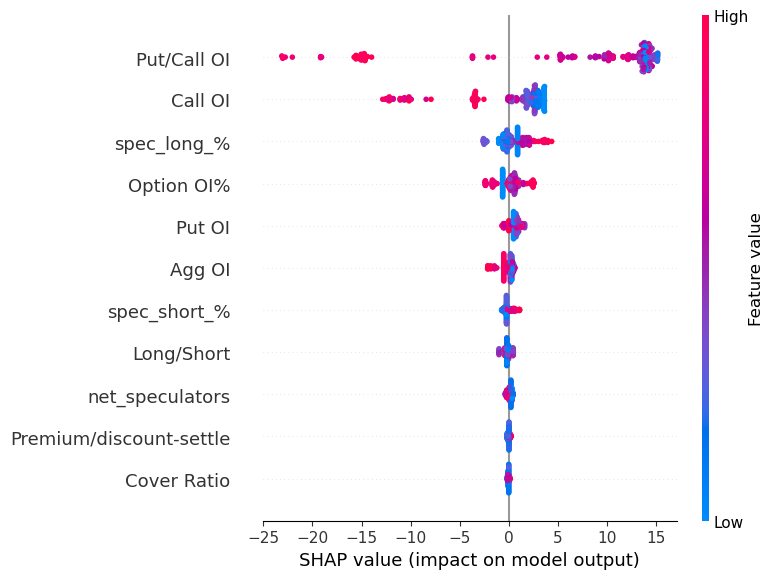

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Assuming data is already loaded and preprocessed as 'data'

# Define target and features
target = 'Auc Price'
features = ['Cover Ratio', 'Premium/discount-settle', 
            'net_speculators', 'spec_long_%', 'spec_short_%', 'Long/Short', 
            'Put OI', 'Call OI', 'Agg OI', 'Option OI%', 'Put/Call OI']

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test)

# Plot SHAP dependence plot for a specific feature
# shap.dependence_plot('Cover Ratio', shap_values, X_test)

# Force plot for a specific prediction
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# For Jupyter notebook users to display force plot
# shap.initjs()

In [61]:
import numpy as np
np.float_ = np.float64
from prophet import Prophet
# !pip install "numpy<2"


In [113]:
data[['Auc Price']].resample('W').mean().reset_index()

Date  Auc Price
0   2020-05-10  19.166667
1   2020-05-17  18.811429
2   2020-05-24  19.981429
3   2020-05-31  21.294286
4   2020-06-07  22.014286
..         ...        ...
216 2024-06-30  65.591429
217 2024-07-07  68.304286
218 2024-07-14  67.404286
219 2024-07-21  65.485714
220 2024-07-28  64.020000

[221 rows x 2 columns]

In [119]:
df_prophet = data.reset_index()[['Date', 'Auc Price']]
df_prophet.columns = ['ds', 'y']

train_df = df_prophet.iloc[:-30]
test_df = df_prophet.iloc[-30:]

prophet_model = Prophet()
prophet_model.fit(train_df)

# Create a DataFrame for future dates
future_dates = prophet_model.make_future_dataframe(periods=30, include_history=False)  # Forecast for the next 2 weeks
forecast_prophet = prophet_model.predict(future_dates)

test_df['forecast'] = forecast_prophet['yhat'].values
test_df['forecast_u'] = forecast_prophet['yhat_upper'].values
test_df['forecast_l'] = forecast_prophet['yhat_lower'].values

17:04:49 - cmdstanpy - INFO - Chain [1] start processing
17:04:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/225135.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['forecast'] = forecast_prophet['yhat'].values
/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/225135.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['forecast_u'] = forecast_prophet['yhat_upper'].values
/var/folders/zf/km2fq0xs06g8b5nj2

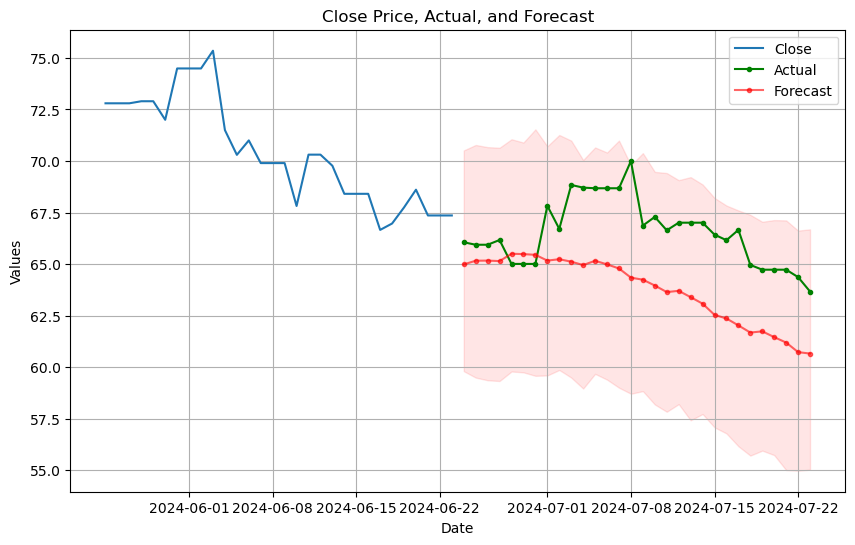

In [120]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot columns from the first dataframe
plt.plot(train_df.iloc[-30:]['ds'], train_df.iloc[-30:]['y'], label='Close')

# Plot columns from the second dataframe
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='green', marker= 'o', markersize=3)
plt.plot(test_df['ds'], test_df['forecast'], label='Forecast', color='red', alpha=0.6, marker= 'o', markersize=3)
plt.fill_between(test_df['ds'],test_df['forecast_u'],test_df['forecast_l'],interpolate=True,color='red',alpha=0.1)



plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Close Price, Actual, and Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
df_prophet = data[['Auc Price']].resample('W').mean().reset_index()
df_prophet.columns = ['ds', 'y']

forecast_days = 15

train_df = df_prophet.iloc[:-forecast_days]
test_df = df_prophet.iloc[-forecast_days:]

prophet_model = Prophet()
prophet_model.fit(train_df)

# Create a DataFrame for future dates
future_dates = prophet_model.make_future_dataframe(periods=forecast_days, include_history=False)  # Forecast for the next 2 weeks
forecast_prophet = prophet_model.predict(future_dates)

test_df['forecast'] = forecast_prophet['yhat'].values
test_df['forecast_u'] = forecast_prophet['yhat_upper'].values
test_df['forecast_l'] = forecast_prophet['yhat_lower'].values

17:04:33 - cmdstanpy - INFO - Chain [1] start processing
17:04:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/4053821908.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['forecast'] = forecast_prophet['yhat'].values
/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/4053821908.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['forecast_u'] = forecast_prophet['yhat_upper'].values
/var/folders/zf/km2fq0xs0

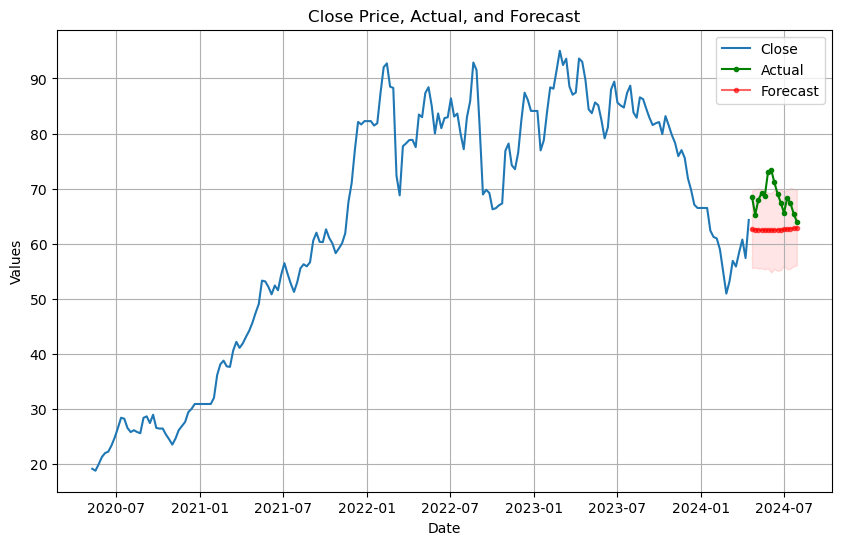

In [118]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot columns from the first dataframe
plt.plot(train_df['ds'], train_df['y'], label='Close')

# Plot columns from the second dataframe
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='green', marker= 'o', markersize=3)
plt.plot(test_df['ds'], test_df['forecast'], label='Forecast', color='red', alpha=0.6, marker= 'o', markersize=3)
plt.fill_between(test_df['ds'],test_df['forecast_u'],test_df['forecast_l'],interpolate=True,color='red',alpha=0.1)



plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Close Price, Actual, and Forecast')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/3052292605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['forecast'] = forecast_prophet['yhat'].values
/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/3052292605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['forecast_u'] = forecast_prophet['yhat_upper'].values
/var/folders/zf/km2fq0xs06g8b5nj2t36d5fw0000gn/T/ipykernel_13100/3052292605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

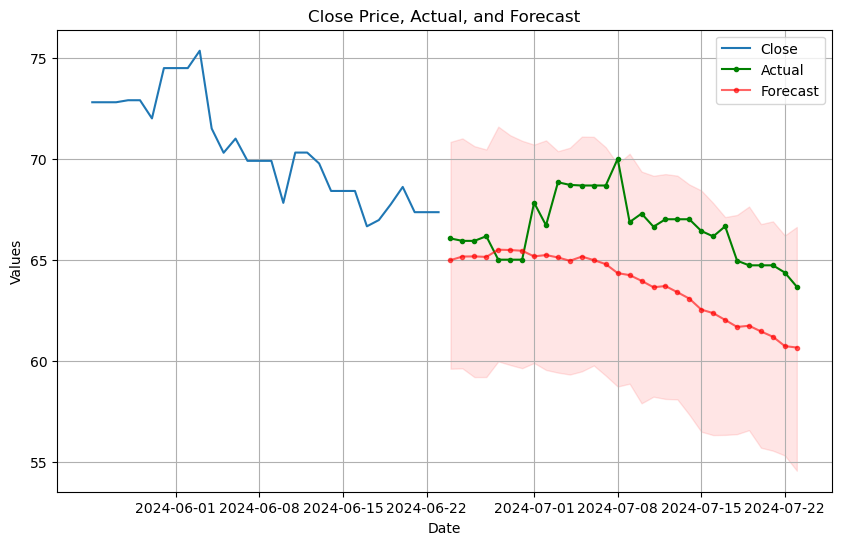

In [60]:
train_df['forecast']

0       64.596502
1       64.478125
2       64.191138
3       63.858028
4       63.893941
          ...    
1520          NaN
1521          NaN
1522          NaN
1523          NaN
1524          NaN
Name: forecast, Length: 1525, dtype: float64

/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


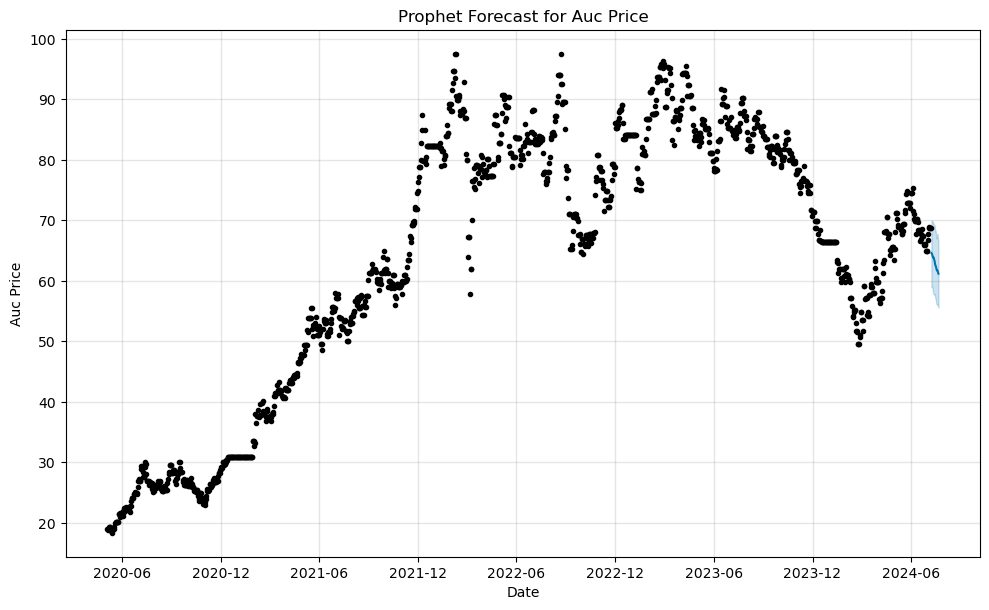

In [52]:
# Plot the forecast
prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast for Auc Price')
plt.xlabel('Date')
plt.ylabel('Auc Price')
plt.show()



16:38:40 - cmdstanpy - INFO - Chain [1] start processing
16:38:41 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


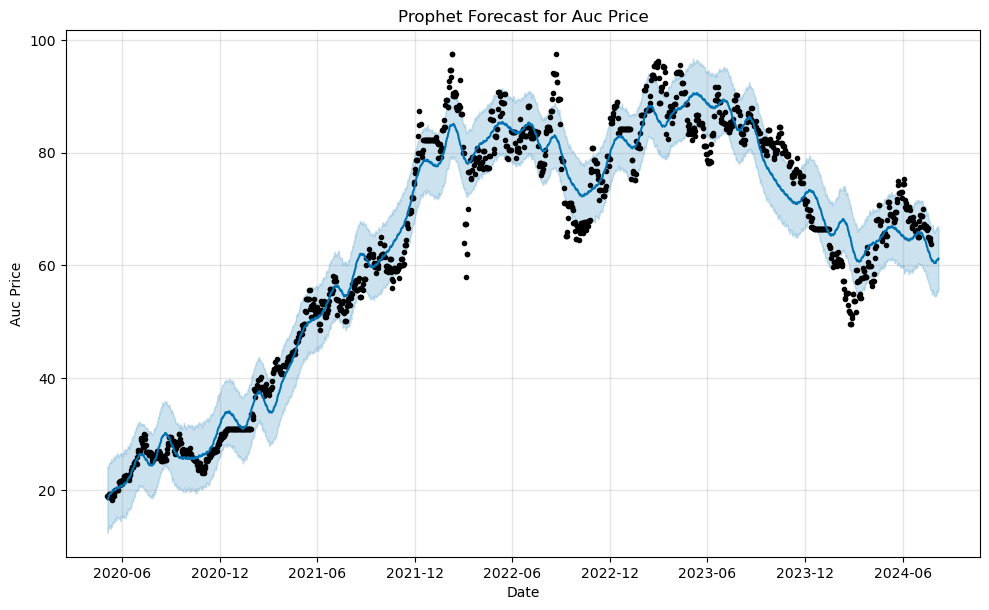

/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/junction/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an 

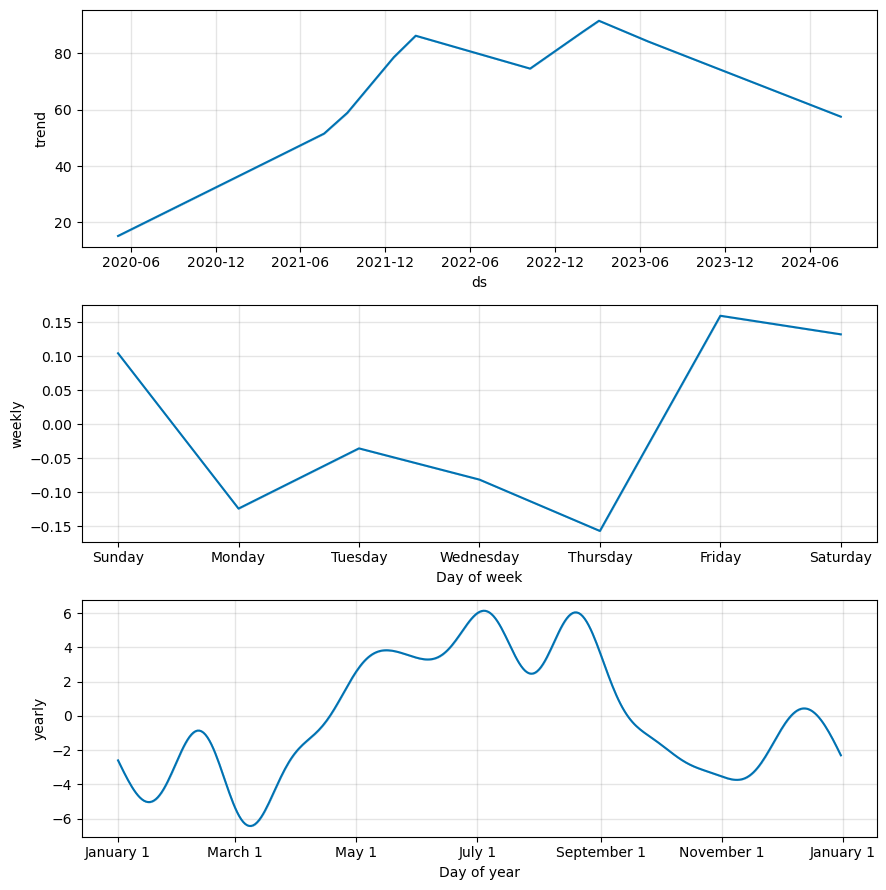

In [27]:
import pandas as pd

# Prepare data for Prophet
df_prophet = data.reset_index()[['Date', 'Auc Price']]
df_prophet.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create a DataFrame for future dates
future_dates = prophet_model.make_future_dataframe(periods=14)  # Forecast for the next 2 weeks

# Forecast the future
forecast_prophet = prophet_model.predict(future_dates)

# Plot the forecast
prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast for Auc Price')
plt.xlabel('Date')
plt.ylabel('Auc Price')
plt.show()

# Plot the forecast components
prophet_model.plot_components(forecast_prophet)
plt.show()